In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter('ignore')

In [2]:
df_train = pd.read_csv("D:\\Data Science\\kaggle\\titanic kaggle\\train.csv")
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df_train.shape

(891, 12)

In [5]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df_train = df_train.drop(columns=['Name','Ticket','Cabin'])
df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [7]:
df_train.shape

(891, 9)

In [8]:
df_train.duplicated().sum()

0

In [9]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

<Axes: >

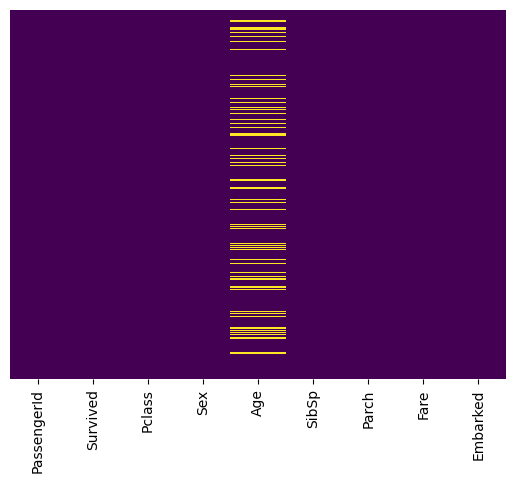

In [10]:
sns.heatmap(df_train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<Axes: xlabel='Survived', ylabel='count'>

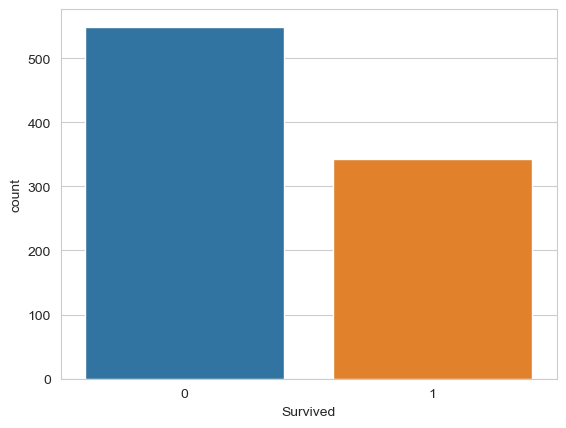

In [11]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=df_train)

<Axes: xlabel='Survived', ylabel='count'>

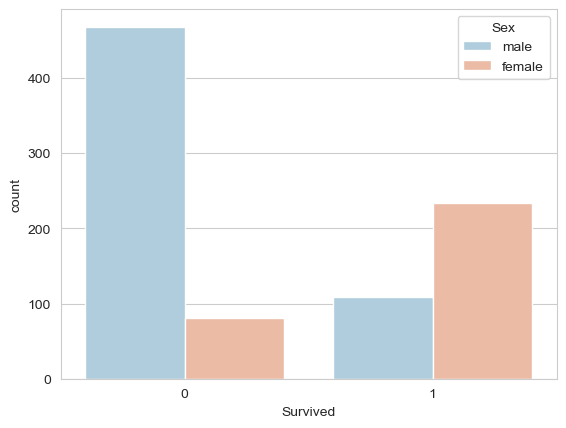

In [12]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=df_train,palette='RdBu_r')

<Axes: xlabel='Survived', ylabel='count'>

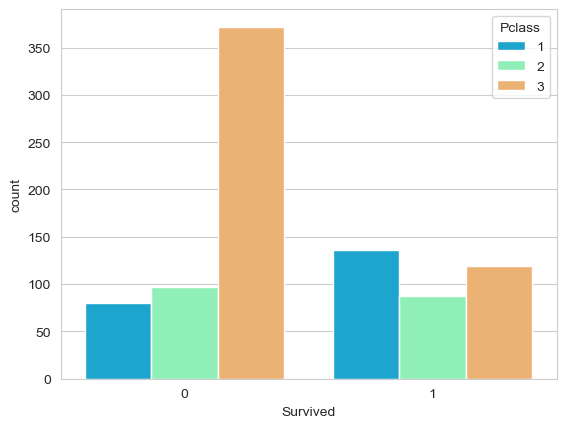

In [13]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=df_train,palette='rainbow')

<Axes: xlabel='Age', ylabel='Density'>

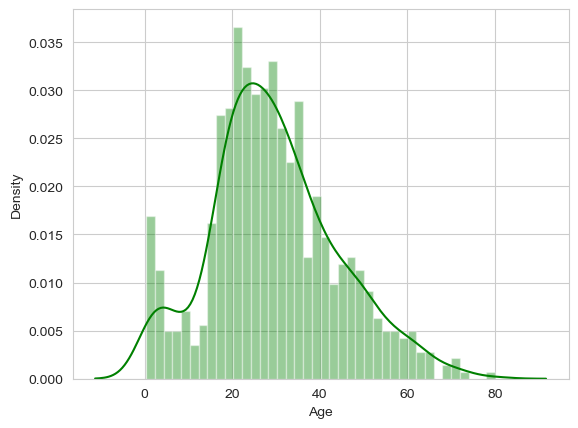

In [14]:
sns.distplot(df_train['Age'].dropna(),kde=True,color='green',bins=40)

<Axes: >

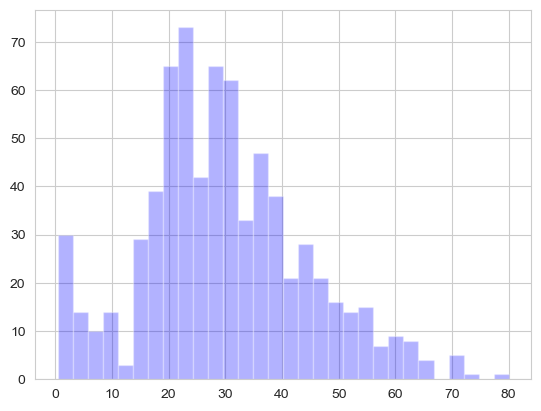

In [15]:
df_train['Age'].hist(bins=30,color='blue',alpha=0.3)

<Axes: xlabel='SibSp', ylabel='count'>

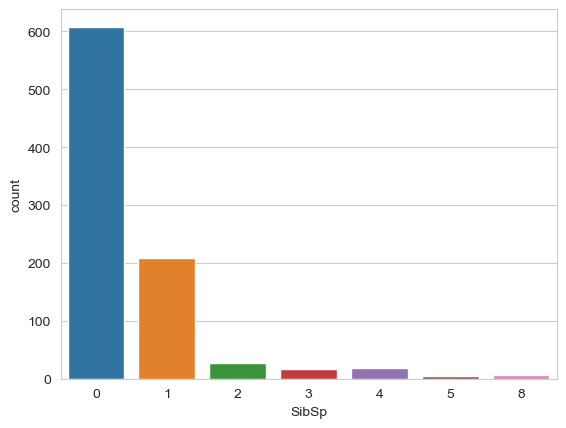

In [16]:
sns.countplot(x='SibSp',data=df_train)

<Axes: >

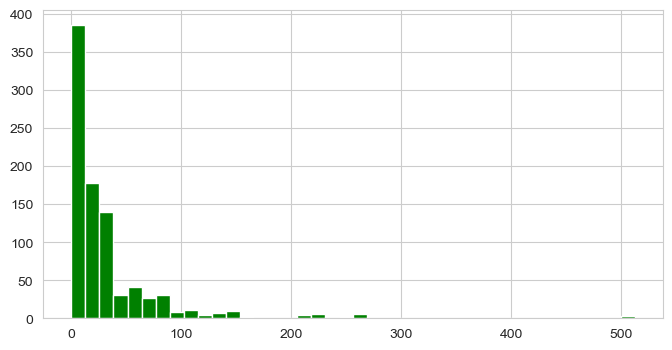

In [17]:
df_train['Fare'].hist(color='green',bins=40,figsize=(8,4))

<Axes: xlabel='Pclass', ylabel='Age'>

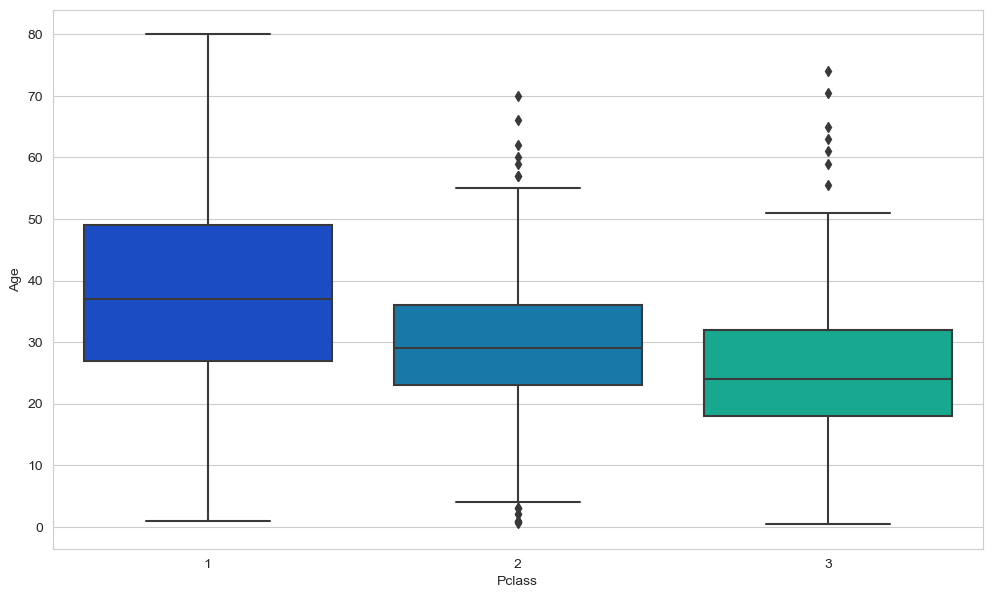

In [18]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass',y='Age',data=df_train,palette='winter')

In [19]:
df_train['Age'].isnull().sum()

177

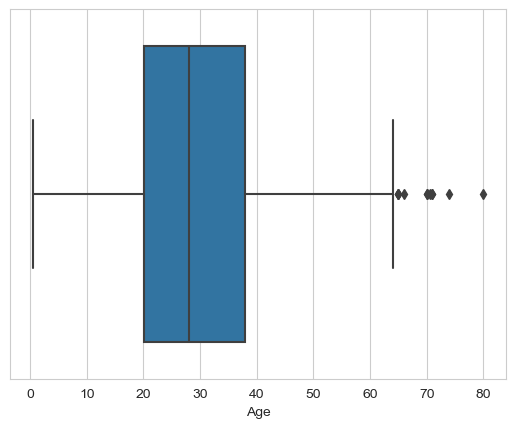

In [20]:
sns.boxplot(x=df_train['Age'])
plt.show()

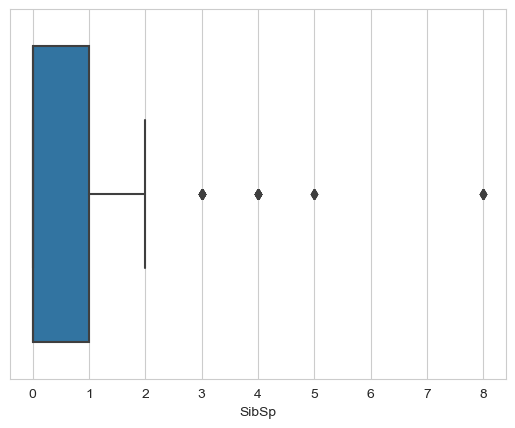

In [21]:
sns.boxplot(x=df_train['SibSp'])
plt.show()

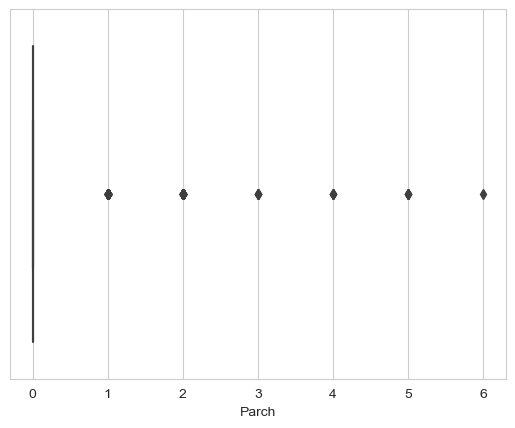

In [22]:
sns.boxplot(x=df_train['Parch'])
plt.show()

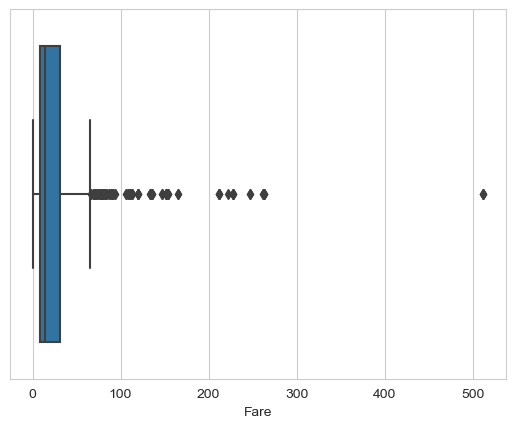

In [23]:
sns.boxplot(x=df_train['Fare'])
plt.show()

In [24]:
df_train['Embarked'].isnull().sum()

2

In [25]:
df_train['Age'].fillna(df_train['Age'].median(),inplace=True)
df_train['Embarked'].fillna(df_train['Embarked'].mode()[0],inplace=True)

In [26]:
df_train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [27]:
df_train['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [28]:
df_train['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [29]:
df_train['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [30]:
df_train['Fare'].value_counts()

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: Fare, Length: 248, dtype: int64

In [31]:
df_train['Fare'].skew()

4.787316519674893

In [32]:
df_train['Age'].skew()

0.5102446555756495

In [33]:
df_train['SibSp'].skew()

3.6953517271630565

In [34]:
df_train['Parch'].skew()

2.7491170471010933

In [35]:
from scipy import stats

In [36]:
df_train['SibSp_boxcox'],param = stats.boxcox(df_train.SibSp+0.01)
df_train['SibSp_boxcox'].skew()

0.7872453544616682

In [37]:
df_train['Parch_boxcox'],param = stats.boxcox(df_train.Parch+0.01)
df_train['Parch_boxcox'].skew()


1.2259065239301579

In [38]:
df_train['Fare_boxcox'],param = stats.boxcox(df_train.Fare+0.01)
df_train['Fare_boxcox'].skew()

0.25282461235568676

In [39]:
df_train.isnull().sum()

PassengerId     0
Survived        0
Pclass          0
Sex             0
Age             0
SibSp           0
Parch           0
Fare            0
Embarked        0
SibSp_boxcox    0
Parch_boxcox    0
Fare_boxcox     0
dtype: int64

In [40]:
df_train = df_train.drop(columns=['Parch','SibSp','Fare'])
df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,Embarked,SibSp_boxcox,Parch_boxcox,Fare_boxcox
0,1,0,3,male,22.0,S,0.009926,-43.335524,2.384456
1,2,1,1,female,38.0,C,0.009926,-43.335524,6.433577
2,3,1,3,female,26.0,S,-17.176612,-43.335524,2.512739
3,4,1,1,female,35.0,S,0.009926,-43.335524,5.813111
4,5,0,3,male,35.0,S,-17.176612,-43.335524,2.535507


In [41]:
enc_embark = pd.get_dummies(df_train['Embarked'],drop_first = True)
df_train = pd.concat([df_train,enc_embark],axis=1)
df_train.drop('Embarked',axis=1,inplace=True)
df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp_boxcox,Parch_boxcox,Fare_boxcox,Q,S
0,1,0,3,male,22.0,0.009926,-43.335524,2.384456,0,1
1,2,1,1,female,38.0,0.009926,-43.335524,6.433577,0,0
2,3,1,3,female,26.0,-17.176612,-43.335524,2.512739,0,1
3,4,1,1,female,35.0,0.009926,-43.335524,5.813111,0,1
4,5,0,3,male,35.0,-17.176612,-43.335524,2.535507,0,1


In [42]:
enc_sex = pd.get_dummies(df_train['Sex'],drop_first = True)
df_train = pd.concat([df_train,enc_sex],axis=1)
df_train.drop('Sex',axis=1,inplace=True)
df_train.head()

,PassengerId,Survived,Pclass,Age,SibSp_boxcox,Parch_boxcox,Fare_boxcox,Q,S,male
0,1,0,3,22.0,0.009926,-43.335524,2.384456,0,1,1
1,2,1,1,38.0,0.009926,-43.335524,6.433577,0,0,0
2,3,1,3,26.0,-17.176612,-43.335524,2.512739,0,1,0
3,4,1,1,35.0,0.009926,-43.335524,5.813111,0,1,0
4,5,0,3,35.0,-17.176612,-43.335524,2.535507,0,1,1


In [43]:
df_train['SibSp']=df_train['SibSp_boxcox']
df_train['Parch'] = df_train['Parch_boxcox']

df_train['Fare']=df_train['Fare_boxcox']
df_train.drop(columns = ['SibSp_boxcox','Parch_boxcox','Fare_boxcox',],inplace=True)
df_train.head()

,PassengerId,Survived,Pclass,Age,Q,S,male,SibSp,Parch,Fare
0,1,0,3,22.0,0,1,1,0.009926,-43.335524,2.384456
1,2,1,1,38.0,0,0,0,0.009926,-43.335524,6.433577
2,3,1,3,26.0,0,1,0,-17.176612,-43.335524,2.512739
3,4,1,1,35.0,0,1,0,0.009926,-43.335524,5.813111
4,5,0,3,35.0,0,1,1,-17.176612,-43.335524,2.535507


In [44]:
df_train.drop('Pclass',inplace=True,axis=1)

In [45]:
y = df_train['Survived']
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [46]:
df_train = df_train.drop(columns = 'Survived')

In [47]:
x = df_train[['PassengerId','male','Age','SibSp','Parch','Fare','Q','S']]
x.head()

,PassengerId,male,Age,SibSp,Parch,Fare,Q,S
0,1,1,22.0,0.009926,-43.335524,2.384456,0,1
1,2,0,38.0,0.009926,-43.335524,6.433577,0,0
2,3,0,26.0,-17.176612,-43.335524,2.512739,0,1
3,4,0,35.0,0.009926,-43.335524,5.813111,0,1
4,5,1,35.0,-17.176612,-43.335524,2.535507,0,1


In [48]:
y.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [49]:
#imbalance dataset
from imblearn.over_sampling import SMOTE
SMOTE=SMOTE()
x_new,y_new = SMOTE.fit_resample(x,y)
y_new.value_counts()

0    549
1    549
Name: Survived, dtype: int64

In [50]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=6)

In [51]:
x.corr()

,PassengerId,male,Age,SibSp,Parch,Fare,Q,S
PassengerId,1.000000,0.042939,0.034212,-0.054674,0.004950,-0.008860,-0.033606,0.022204
male,0.042939,1.000000,0.081163,-0.202249,-0.248051,-0.257281,-0.074115,0.119224
Age,0.034212,0.081163,1.000000,-0.149553,-0.253551,0.104758,-0.031415,-0.006729
SibSp,-0.054674,-0.202249,-0.149553,1.000000,0.426567,0.366227,-0.054502,0.006813
Parch,0.004950,-0.248051,-0.253551,0.426567,1.000000,0.345493,-0.097598,0.033372
Fare,-0.008860,-0.257281,0.104758,0.366227,0.345493,1.000000,-0.144573,-0.140989
Q,-0.033606,-0.074115,-0.031415,-0.054502,-0.097598,-0.144573,1.000000,-0.499421
S,0.022204,0.119224,-0.006729,0.006813,0.033372,-0.140989,-0.499421,1.000000


In [52]:
df_train['Age'].describe()

count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [53]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df_train['Age']=sc.fit_transform(df_train[['Age']])
df_train.head()

,PassengerId,Age,Q,S,male,SibSp,Parch,Fare
0,1,-0.565736,0,1,1,0.009926,-43.335524,2.384456
1,2,0.663861,0,0,0,0.009926,-43.335524,6.433577
2,3,-0.258337,0,1,0,-17.176612,-43.335524,2.512739
3,4,0.433312,0,1,0,0.009926,-43.335524,5.813111
4,5,0.433312,0,1,1,-17.176612,-43.335524,2.535507


In [54]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
df_train['Parch']=sc.fit_transform(df_train[['Parch']])
df_train.tail()

,PassengerId,Age,Q,S,male,SibSp,Parch,Fare
886,887,-0.181487,0,1,1,-17.176612,0.000000,3.265085
887,888,-0.796286,0,1,0,-17.176612,0.000000,4.700392
888,889,-0.104637,0,1,0,0.009926,0.990215,4.254769
889,890,-0.258337,0,0,1,-17.176612,0.000000,4.700392
890,891,0.202762,1,0,1,-17.176612,0.000000,2.480366


In [55]:
x

,PassengerId,male,Age,SibSp,Parch,Fare,Q,S
0,1,1,22.0,0.009926,-43.335524,2.384456,0,1
1,2,0,38.0,0.009926,-43.335524,6.433577,0,0
2,3,0,26.0,-17.176612,-43.335524,2.512739,0,1
3,4,0,35.0,0.009926,-43.335524,5.813111,0,1
4,5,1,35.0,-17.176612,-43.335524,2.535507,0,1
...,...,...,...,...,...,...,...,...
886,887,1,27.0,-17.176612,-43.335524,3.265085,0,1
887,888,0,19.0,-17.176612,-43.335524,4.700392,0,1
888,889,0,28.0,0.009926,0.540494,4.254769,0,1
889,890,1,26.0,-17.176612,-43.335524,4.700392,0,0


In [56]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()
log_reg.fit(x_train,y_train)


test_pred=log_reg.predict(x_test)
train_pred=log_reg.predict(x_train)


from sklearn.metrics import accuracy_score
print("test_accuracy:",accuracy_score(y_test,test_pred))
print("train_accuracy:",accuracy_score(y_train,train_pred))

from sklearn.model_selection import cross_val_score
print("cross_validation_score:",cross_val_score(log_reg,x,y,cv=5).mean())

test_accuracy: 0.8171641791044776
train_accuracy: 0.7656500802568218
cross_validation_score: 0.7845019145063086


In [57]:
trn = []
tst = []
cv = []
for i in range(0,51):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state = i)
    log_default = LogisticRegression()
    log_default.fit(x_train,y_train)
    ypred_train = log_default.predict(x_train)
    ypred_test = log_default.predict(x_test)
    trn.append(accuracy_score(y_train,ypred_train))
    tst.append(accuracy_score(y_test,ypred_test))
    cv.append(cross_val_score(log_default,x,y,cv=5,scoring='accuracy').mean())

em = pd.DataFrame({'Train':trn,'Test':tst,'cv':cv})
gm = em[(abs(em['Train']-em['Test'])<=0.05) & (abs(em['Test']-em['cv'])<=0.05)]
print('best random state no ',gm[gm['Test']==gm['Test'].max()].index.to_list()[0])

best random state no  6


In [58]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()
log_reg.fit(x_train,y_train)


test_pred=log_reg.predict(x_test)
train_pred=log_reg.predict(x_train)


from sklearn.metrics import accuracy_score
print("test_accuracy:",accuracy_score(y_test,test_pred))
print("train_accuracy:",accuracy_score(y_train,train_pred))

from sklearn.model_selection import cross_val_score
print("cross_validation_score:",cross_val_score(log_reg,x,y,cv=5).mean())

test_accuracy: 0.7821229050279329
train_accuracy: 0.7851123595505618
cross_validation_score: 0.7845019145063086


In [59]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,test_pred)

array([[86, 15],
       [24, 54]], dtype=int64)

In [60]:
from sklearn.metrics import classification_report
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       0.78      0.85      0.82       101
           1       0.78      0.69      0.73        78

    accuracy                           0.78       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179



In [61]:
# random forest

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=6)
model.fit(x_train,y_train)

ypred_train = model.predict(x_train)
ypred_test = model.predict(x_test)

from sklearn.metrics import accuracy_score
print('train accuracy:',accuracy_score(ypred_train,y_train))
print('test accuracy:',accuracy_score(ypred_test,y_test))

from sklearn.model_selection import cross_val_score
scores = cross_val_score(model,x,y,cv=5)
print('cross validation score:',scores.mean())

train accuracy: 1.0
test accuracy: 0.770949720670391
cross validation score: 0.7812629464565941


In [62]:
# hyper parameter tuning
from sklearn.model_selection import GridSearchCV

estimator = RandomForestClassifier(random_state=6)

param_grid = {'n_estimators':list(range(1,51))}

grid = GridSearchCV(estimator,param_grid,scoring='accuracy',cv=5)

grid.fit(x_train,y_train)

grid.best_params_

{'n_estimators': 38}

In [63]:
model=RandomForestClassifier(n_estimators=38,random_state=6)
model.fit(x_train,y_train)

ypred_train = model.predict(x_train)
ypred_test = model.predict(x_test)

print('train accuracy:',accuracy_score(ypred_train,y_train))
print('test accuracy:',accuracy_score(ypred_test,y_test))

scores=cross_val_score(model,x,y,cv=5)
print('cross validation score:',scores.mean())

train accuracy: 1.0
test accuracy: 0.7877094972067039
cross validation score: 0.7767685644341222


In [64]:
#adaboost

from sklearn.ensemble import AdaBoostClassifier
model=AdaBoostClassifier()
model.fit(x_train,y_train)

ypred_train = model.predict(x_train)
predictions=model.predict(x_test)

from sklearn.metrics import accuracy_score
print('train accuracy:',accuracy_score(y_train,ypred_train))
print('test accuracy:',accuracy_score(y_test,predictions))

from sklearn.model_selection import cross_val_score
scores=cross_val_score(model,x,y,cv=5)
print('cross validation score:',scores.mean())

train accuracy: 0.8370786516853933
test accuracy: 0.8100558659217877
cross validation score: 0.7307701964722867


In [65]:
from sklearn.model_selection import GridSearchCV
estimator=AdaBoostClassifier()
param_grid = {'n_estimators':list(range(1,51))}
grid=GridSearchCV(estimator,param_grid,cv=5,scoring='accuracy')
grid.fit(x_train,y_train)
grid.best_params_

{'n_estimators': 4}

In [66]:
grid.best_estimator_

AdaBoostClassifier(n_estimators=4)

In [67]:
grid.best_estimator_.feature_importances_

array([0.  , 0.25, 0.25, 0.25, 0.  , 0.25, 0.  , 0.  ])

In [68]:
feats=pd.DataFrame(data=grid.best_estimator_.feature_importances_,
                  index=x.columns,
                  columns=['Importance'])

important_features=feats[feats['Importance']>0]
important_features

,Importance
male,0.25
Age,0.25
SibSp,0.25
Fare,0.25


In [69]:
imp_features_list=feats[feats['Importance']>0].index.to_list()
imp_features_list

['male', 'Age', 'SibSp', 'Fare']

In [70]:
x_imp = x[imp_features_list]


x_train,x_test,y_train,y_test=train_test_split(x_imp,y,test_size=0.3,random_state=6)

ada_bhp= AdaBoostClassifier(n_estimators=4)
ada_bhp.fit(x_train,y_train)

ypred_train=ada_bhp.predict(x_train)
predictions=ada_bhp.predict(x_test)

from sklearn.metrics import accuracy_score
print('train accuracy:',accuracy_score(y_train,ypred_train))
print('test accuracy:',accuracy_score(y_test,predictions))

scores=cross_val_score(ada_bhp,x,y,cv=5)
print('cross validation score:',scores.mean())

train accuracy: 0.7961476725521669
test accuracy: 0.8395522388059702
cross validation score: 0.800207143305505


In [71]:
# gradient boosting

from sklearn.ensemble import GradientBoostingClassifier
gb_model = GradientBoostingClassifier()
gb_model.fit(x_train,y_train)

ypred_train = gb_model.predict(x_train)
ypred_test = gb_model.predict(x_test)

from sklearn.metrics import accuracy_score
print('train accuracy:',accuracy_score(y_train,ypred_train))
print('test accuracy:',accuracy_score(y_test,ypred_test))

from sklearn.model_selection import cross_val_score
scores = cross_val_score(gb_model,x,y,cv=5)
print('cross validation score:',scores.mean())

train accuracy: 0.8860353130016051
test accuracy: 0.832089552238806
cross validation score: 0.7700772079593247


In [72]:
from sklearn.model_selection import GridSearchCV
estimator=GradientBoostingClassifier()
param_grid={'n_estimators':[1,5,10,20,40,100],
           'learning_rate':[0.1,0.2,0.3,0.5,0.8,1]}

grid=GridSearchCV(estimator,param_grid,cv=5,scoring='accuracy')

grid.fit(x_train,y_train)
print(grid.best_params_)
print(grid.best_estimator_)

{'learning_rate': 0.3, 'n_estimators': 10}
GradientBoostingClassifier(learning_rate=0.3, n_estimators=10)


In [73]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=6)

gb_bhp=GradientBoostingClassifier(n_estimators=30,learning_rate=0.1)
gb_bhp.fit(x_train,y_train)

ypred_train=gb_bhp.predict(x_train)
ypred_test=gb_bhp.predict(x_test)

from sklearn.metrics import accuracy_score
print('train accuracy:',accuracy_score(y_train,ypred_train))
print('test accuracy:',accuracy_score(y_test,ypred_test))
scores=cross_val_score(gb_bhp,x,y,cv=5)
print('cross validation score:',scores.mean())

train accuracy: 0.8539325842696629
test accuracy: 0.835820895522388
cross validation score: 0.7880045194903019


In [74]:
# xg boost
!pip install xgboost
from xgboost import XGBClassifier
xgb_model=XGBClassifier()
xgb_model.fit(x_train,y_train)

ypred_train=xgb_model.predict(x_train)
ypred_test=xgb_model.predict(x_test)

from sklearn.metrics import accuracy_score
print('train accuracy:',accuracy_score(y_train,ypred_train))
print('test accuracy:',accuracy_score(y_test,ypred_test))

from sklearn.model_selection import cross_val_score
scores= cross_val_score(xgb_model, x, y, cv=5)
print('cross validation score:',scores.mean())

train accuracy: 1.0
test accuracy: 0.7723880597014925
cross validation score: 0.7823928190320759


In [75]:
from sklearn.model_selection import GridSearchCV
estimator=XGBClassifier()
param_grid={'n_estimators':[10,20,40,100],
           'max_depth':[3,4,5],
           'gamma':[0,0.15,0.3,0.5,1]}
grid=GridSearchCV(xgb_model,param_grid,cv=5,scoring='accuracy')
grid.fit(x_train,y_train)
grid.best_params_

{'gamma': 0.3, 'max_depth': 5, 'n_estimators': 40}

In [76]:
xgb_bhp=XGBClassifier(gamma=0.3,max_depth=5,n_estimators=5)
xgb_bhp.fit(x_train,y_train)

ypred_train=xgb_bhp.predict(x_train)
ypred_test=xgb_bhp.predict(x_test)

from sklearn.metrics import accuracy_score
print('train accuracy:',accuracy_score(y_train,ypred_train))
print('test accuracy:',accuracy_score(y_test,ypred_test))

scores=cross_val_score(xgb_bhp,x,y,cv=5)
print('cross validation score:',scores.mean())

train accuracy: 0.8571428571428571
test accuracy: 0.8208955223880597
cross validation score: 0.7845521310652187


In [77]:
# decision tree
from sklearn.tree import DecisionTreeClassifier
dt_default=DecisionTreeClassifier(random_state=6)
dt_default.fit(x_train,y_train)

pred_train=dt_default.predict(x_train)
base_pred=dt_default.predict(x_test)

from sklearn.metrics import accuracy_score
print('train accuracy:',accuracy_score(pred_train,y_train))
print('test accuracy:',accuracy_score(base_pred,y_test))

from sklearn.model_selection import cross_val_score
scores = cross_val_score(dt_default,x,y,cv=5)
print('cross validation score:',scores.mean())

train accuracy: 1.0
test accuracy: 0.7761194029850746
cross validation score: 0.7465381959701212


In [78]:
from sklearn.model_selection import GridSearchCV
estimator = DecisionTreeClassifier(random_state=6)

param_grid={'criterion':['gini','entropy'],
           'max_depth':[1,2,3,4]}

grid= GridSearchCV(estimator,param_grid,scoring='accuracy',cv=5)

grid.fit(x_train,y_train)

grid.best_params_

{'criterion': 'entropy', 'max_depth': 3}

In [79]:
dt_bhp = DecisionTreeClassifier(criterion='entropy',max_depth = 3,random_state = 6)
dt_bhp.fit(x_train,y_train)

ypred_train = dt_bhp.predict(x_train)
ypred_test = dt_bhp.predict(x_test)

print('train accuracy:',accuracy_score(ypred_train,y_train))
print('test accuracy:',accuracy_score(ypred_test,y_test))

scores=cross_val_score(dt_bhp,x,y,cv=5)
print('cross validation score:',scores.mean())

train accuracy: 0.8041733547351525
test accuracy: 0.8470149253731343
cross validation score: 0.8069487163392128


In [80]:
# svm

from sklearn.svm import SVC
model = SVC()
model.fit(x_train,y_train)

#predictions
ypred_train = model.predict(x_train)
ypred_test = model.predict(x_test)

#accuracy
from sklearn.metrics import accuracy_score
print('Train ',accuracy_score(y_train,ypred_train))
print('Test ',accuracy_score(y_test,ypred_test))
scores=cross_val_score(model,x,y,cv=5)
print('cross validation score:',scores.mean())

Train  0.6019261637239165
Test  0.6492537313432836
cross validation score: 0.6161634548992531


In [81]:
from sklearn.model_selection import GridSearchCV
estimator = SVC()
param_grid = {'C':[0.01,0.1,1,10,100],'kernel':['linear','rbf','sigmoid','poly']}
grid = GridSearchCV(estimator,param_grid,cv=5)
grid.fit(x,y)
grid.best_params_

{'C': 0.1, 'kernel': 'linear'}

In [82]:
model = SVC(kernel='rbf',C=100)
model.fit(x_train,y_train)

ypred_train = model.predict(x_train)
ypred_test = model.predict(x_test)

print('Train ',accuracy_score(y_train,ypred_train))
print('Test ',accuracy_score(y_test,ypred_test))
scores=cross_val_score(model,x,y,cv=5)
print('cross validation score:',scores.mean())

Train  0.6163723916532905
Test  0.6940298507462687
cross validation score: 0.6273994099554328


In [83]:
# knn
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()
knn_model.fit(x_train,y_train)
ypred_train = knn_model.predict(x_train)
ypred_test = knn_model.predict(x_test)
from sklearn.metrics import accuracy_score
print('Train ',accuracy_score(y_train,ypred_train))
print('Test ',accuracy_score(y_test,ypred_test))
from sklearn.model_selection import cross_val_score
scores = cross_val_score(knn_model,x,y,cv=5)
print('cross validation ',scores.mean())

Train  0.6998394863563403
Test  0.5932835820895522
cross validation  0.49144435377565754


In [84]:
from sklearn.model_selection import GridSearchCV

estimator = KNeighborsClassifier()
param_grid= {'n_neighbors':list(range(1,31)),'p':[1,2]}

cv_classifier = GridSearchCV(estimator,param_grid,cv=5,scoring='accuracy')
cv_classifier.fit(x_train,y_train)
cv_classifier.best_params_

{'n_neighbors': 2, 'p': 1}

In [85]:
knn_model = KNeighborsClassifier(n_neighbors=4,p=1)
knn_model.fit(x_train,y_train)

ypred_test = knn_model.predict(x_test)
ypred_train = knn_model.predict(x_train)

print('Train ',accuracy_score(y_train,ypred_train))
print('Test ',accuracy_score(y_test,ypred_test))
scores = cross_val_score(knn_model,x,y,cv=5)
print('cross validation ',scores.mean())

Train  0.7158908507223114
Test  0.6529850746268657
cross validation  0.5498713200677923


In [86]:
df_train.shape

(891, 8)

In [87]:
# ann deep

!pip install tensorflow
!pip install keras
import tensorflow as tf
import keras

In [88]:
from keras.models import Sequential
ann = Sequential()
from keras.layers import Dense
ann.add(Dense(input_dim = 8,units=6,kernel_initializer = 'uniform',activation = 'relu'))
ann.add(Dense(units=6,kernel_initializer='uniform',activation = 'relu'))
ann.add(Dense(units=1,kernel_initializer='uniform',activation = 'sigmoid'))
ann.compile(optimizer='adam',loss='binary_crossentropy',metrics = ['accuracy'])
ann.fit(x_train,y_train,epochs=50,batch_size = 10)

Epoch 1/50
63/63 [==============================] - 1s 2ms/step - loss: 0.6860 - accuracy: 0.5875
Epoch 2/50
63/63 [==============================] - 0s 2ms/step - loss: 0.6770 - accuracy: 0.6019
Epoch 3/50
63/63 [==============================] - 0s 2ms/step - loss: 0.6750 - accuracy: 0.6019
Epoch 4/50
63/63 [==============================] - 0s 2ms/step - loss: 0.6727 - accuracy: 0.6019
Epoch 5/50
63/63 [==============================] - 0s 2ms/step - loss: 0.6725 - accuracy: 0.6019
Epoch 6/50
63/63 [==============================] - 0s 2ms/step - loss: 0.6677 - accuracy: 0.6019
Epoch 7/50
63/63 [==============================] - 0s 2ms/step - loss: 0.6654 - accuracy: 0.6019
Epoch 8/50
63/63 [==============================] - 0s 2ms/step - loss: 0.6637 - accuracy: 0.6019
Epoch 9/50
63/63 [==============================] - 0s 2ms/step - loss: 0.6623 - accuracy: 0.6019
Epoch 10/50
63/63 [==============================] - 0s 2ms/step - loss: 0.6588 - accuracy: 0.6019
Epoch 11/50
63/63 [

In [89]:
y_pred = ann.predict(x_test)
y_pred = (y_pred > 0.5)

9/9 [==============================] - 0s 1ms/step


In [90]:
def build_cross_classifier():
    classifier=Sequential()
    classifier.add(Dense(input_dim=8,units=6,kernel_initializer='uniform',activation = 'relu'))
    classifier.add(Dense(units=8,kernel_initializer='uniform',activation='relu'))
    classifier.add(Dense(units=1,kernel_initializer='uniform',activation='sigmoid'))
    classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
    return classifier

In [91]:
!pip install scikeras
from scikeras.wrappers import KerasClassifier
classifier=KerasClassifier(build_cross_classifier,batch_size=10,epochs=50)

In [92]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(classifier,x,y,cv=5)

Epoch 1/50
72/72 [==============================] - 1s 1ms/step - loss: 0.6772 - accuracy: 0.6166
Epoch 2/50
72/72 [==============================] - 0s 1ms/step - loss: 0.6689 - accuracy: 0.6166
Epoch 3/50
72/72 [==============================] - 0s 1ms/step - loss: 0.6662 - accuracy: 0.6166
Epoch 4/50
72/72 [==============================] - 0s 1ms/step - loss: 0.6656 - accuracy: 0.6166
Epoch 5/50
72/72 [==============================] - 0s 1ms/step - loss: 0.6644 - accuracy: 0.6166
Epoch 6/50
72/72 [==============================] - 0s 1ms/step - loss: 0.6647 - accuracy: 0.6166
Epoch 7/50
72/72 [==============================] - 0s 1ms/step - loss: 0.6635 - accuracy: 0.6166
Epoch 8/50
72/72 [==============================] - 0s 1ms/step - loss: 0.6620 - accuracy: 0.6166
Epoch 9/50
72/72 [==============================] - 0s 1ms/step - loss: 0.6604 - accuracy: 0.6166
Epoch 10/50
72/72 [==============================] - 0s 1ms/step - loss: 0.6587 - accuracy: 0.6166
Epoch 11/50
72/72 [

Epoch 15/50
72/72 [==============================] - 0s 2ms/step - loss: 0.6445 - accuracy: 0.6157
Epoch 16/50
72/72 [==============================] - 0s 2ms/step - loss: 0.6416 - accuracy: 0.6157
Epoch 17/50
72/72 [==============================] - 0s 2ms/step - loss: 0.6403 - accuracy: 0.6157
Epoch 18/50
72/72 [==============================] - 0s 2ms/step - loss: 0.6399 - accuracy: 0.6157
Epoch 19/50
72/72 [==============================] - 0s 2ms/step - loss: 0.6368 - accuracy: 0.6157
Epoch 20/50
72/72 [==============================] - 0s 1ms/step - loss: 0.6361 - accuracy: 0.6157
Epoch 21/50
72/72 [==============================] - 0s 2ms/step - loss: 0.6316 - accuracy: 0.6157
Epoch 22/50
72/72 [==============================] - 0s 2ms/step - loss: 0.6299 - accuracy: 0.6157
Epoch 23/50
72/72 [==============================] - 0s 2ms/step - loss: 0.6268 - accuracy: 0.6157
Epoch 24/50
72/72 [==============================] - 0s 2ms/step - loss: 0.6230 - accuracy: 0.6241
Epoch 25/5

In [93]:
print(accuracies)
accuracies.mean()

[0.60893855 0.7752809  0.75842697 0.74157303 0.7752809 ]


0.7319000690477685

In [94]:
estimator = KerasClassifier(build_cross_classifier())
param_grid = {'batch_size': [10,32],'epochs':[50,100],'optimizer':['adam','rmsprop']}
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(estimator,param_grid,scoring='accuracy',cv=5)
grid_result = grid.fit(x_train,y_train)

INFO:tensorflow:Assets written to: C:\Users\debad\AppData\Local\Temp\tmp1t1kapz2\assets


INFO:tensorflow:Assets written to: C:\Users\debad\AppData\Local\Temp\tmp1t1kapz2\assets


INFO:tensorflow:Assets written to: C:\Users\debad\AppData\Local\Temp\tmp8y8qd9ux\assets


INFO:tensorflow:Assets written to: C:\Users\debad\AppData\Local\Temp\tmp8y8qd9ux\assets


Epoch 1/50
50/50 [==============================] - 1s 2ms/step - loss: 0.6920 - accuracy: 0.5723
Epoch 2/50
50/50 [==============================] - 0s 2ms/step - loss: 0.6860 - accuracy: 0.6024
Epoch 3/50
50/50 [==============================] - 0s 2ms/step - loss: 0.6775 - accuracy: 0.6024
Epoch 4/50
50/50 [==============================] - 0s 2ms/step - loss: 0.6748 - accuracy: 0.6024
Epoch 5/50
50/50 [==============================] - 0s 2ms/step - loss: 0.6737 - accuracy: 0.6024
Epoch 6/50
50/50 [==============================] - 0s 2ms/step - loss: 0.6737 - accuracy: 0.6024
Epoch 7/50
50/50 [==============================] - 0s 2ms/step - loss: 0.6726 - accuracy: 0.6024
Epoch 8/50
50/50 [==============================] - 0s 2ms/step - loss: 0.6721 - accuracy: 0.6024
Epoch 9/50
50/50 [==============================] - 0s 2ms/step - loss: 0.6713 - accuracy: 0.6024
Epoch 10/50
50/50 [==============================] - 0s 2ms/step - loss: 0.6721 - accuracy: 0.6024
Epoch 11/50
50/50 [

INFO:tensorflow:Assets written to: C:\Users\debad\AppData\Local\Temp\tmppu0nfxif\assets


INFO:tensorflow:Assets written to: C:\Users\debad\AppData\Local\Temp\tmppu0nfxif\assets


Epoch 1/50
50/50 [==============================] - 0s 1ms/step - loss: 0.6917 - accuracy: 0.5964
Epoch 2/50
50/50 [==============================] - 0s 2ms/step - loss: 0.6836 - accuracy: 0.6024
Epoch 3/50
50/50 [==============================] - 0s 1ms/step - loss: 0.6750 - accuracy: 0.6024
Epoch 4/50
50/50 [==============================] - 0s 2ms/step - loss: 0.6742 - accuracy: 0.6024
Epoch 5/50
50/50 [==============================] - 0s 1ms/step - loss: 0.6718 - accuracy: 0.6024
Epoch 6/50
50/50 [==============================] - 0s 1ms/step - loss: 0.6702 - accuracy: 0.6024
Epoch 7/50
50/50 [==============================] - 0s 2ms/step - loss: 0.6689 - accuracy: 0.6024
Epoch 8/50
50/50 [==============================] - 0s 2ms/step - loss: 0.6680 - accuracy: 0.6024
Epoch 9/50
50/50 [==============================] - 0s 2ms/step - loss: 0.6659 - accuracy: 0.6024
Epoch 10/50
50/50 [==============================] - 0s 2ms/step - loss: 0.6644 - accuracy: 0.6024
Epoch 11/50
50/50 [

INFO:tensorflow:Assets written to: C:\Users\debad\AppData\Local\Temp\tmpowptc47v\assets


INFO:tensorflow:Assets written to: C:\Users\debad\AppData\Local\Temp\tmpowptc47v\assets


Epoch 1/50
50/50 [==============================] - 1s 2ms/step - loss: 0.6913 - accuracy: 0.5964
Epoch 2/50
50/50 [==============================] - 0s 2ms/step - loss: 0.6799 - accuracy: 0.6024
Epoch 3/50
50/50 [==============================] - 0s 2ms/step - loss: 0.6741 - accuracy: 0.6024
Epoch 4/50
50/50 [==============================] - 0s 1ms/step - loss: 0.6728 - accuracy: 0.6024
Epoch 5/50
50/50 [==============================] - 0s 2ms/step - loss: 0.6741 - accuracy: 0.6024
Epoch 6/50
50/50 [==============================] - 0s 2ms/step - loss: 0.6705 - accuracy: 0.6024
Epoch 7/50
50/50 [==============================] - 0s 2ms/step - loss: 0.6705 - accuracy: 0.6024
Epoch 8/50
50/50 [==============================] - 0s 1ms/step - loss: 0.6688 - accuracy: 0.6024
Epoch 9/50
50/50 [==============================] - 0s 2ms/step - loss: 0.6683 - accuracy: 0.6024
Epoch 10/50
50/50 [==============================] - 0s 2ms/step - loss: 0.6666 - accuracy: 0.6024
Epoch 11/50
50/50 [

INFO:tensorflow:Assets written to: C:\Users\debad\AppData\Local\Temp\tmptet5y25k\assets


INFO:tensorflow:Assets written to: C:\Users\debad\AppData\Local\Temp\tmptet5y25k\assets


Epoch 1/50
50/50 [==============================] - 1s 2ms/step - loss: 0.6917 - accuracy: 0.5972
Epoch 2/50
50/50 [==============================] - 0s 2ms/step - loss: 0.6872 - accuracy: 0.6012
Epoch 3/50
50/50 [==============================] - 0s 2ms/step - loss: 0.6739 - accuracy: 0.6012
Epoch 4/50
50/50 [==============================] - 0s 2ms/step - loss: 0.6716 - accuracy: 0.6012
Epoch 5/50
50/50 [==============================] - 0s 2ms/step - loss: 0.6705 - accuracy: 0.6012
Epoch 6/50
50/50 [==============================] - 0s 2ms/step - loss: 0.6686 - accuracy: 0.6012
Epoch 7/50
50/50 [==============================] - 0s 2ms/step - loss: 0.6684 - accuracy: 0.6012
Epoch 8/50
50/50 [==============================] - 0s 1ms/step - loss: 0.6659 - accuracy: 0.6012
Epoch 9/50
50/50 [==============================] - 0s 2ms/step - loss: 0.6651 - accuracy: 0.6012
Epoch 10/50
50/50 [==============================] - 0s 2ms/step - loss: 0.6631 - accuracy: 0.6012
Epoch 11/50
50/50 [

INFO:tensorflow:Assets written to: C:\Users\debad\AppData\Local\Temp\tmpi0kv3_gx\assets


INFO:tensorflow:Assets written to: C:\Users\debad\AppData\Local\Temp\tmpi0kv3_gx\assets


Epoch 1/50
50/50 [==============================] - 0s 2ms/step - loss: 0.6917 - accuracy: 0.6052
Epoch 2/50
50/50 [==============================] - 0s 1ms/step - loss: 0.6854 - accuracy: 0.6012
Epoch 3/50
50/50 [==============================] - 0s 1ms/step - loss: 0.6753 - accuracy: 0.6012
Epoch 4/50
50/50 [==============================] - 0s 1ms/step - loss: 0.6754 - accuracy: 0.6012
Epoch 5/50
50/50 [==============================] - 0s 1ms/step - loss: 0.6723 - accuracy: 0.6012
Epoch 6/50
50/50 [==============================] - 0s 2ms/step - loss: 0.6722 - accuracy: 0.6012
Epoch 7/50
50/50 [==============================] - 0s 2ms/step - loss: 0.6702 - accuracy: 0.6012
Epoch 8/50
50/50 [==============================] - 0s 1ms/step - loss: 0.6673 - accuracy: 0.6012
Epoch 9/50
50/50 [==============================] - 0s 2ms/step - loss: 0.6651 - accuracy: 0.6012
Epoch 10/50
50/50 [==============================] - 0s 2ms/step - loss: 0.6639 - accuracy: 0.6012
Epoch 11/50
50/50 [

INFO:tensorflow:Assets written to: C:\Users\debad\AppData\Local\Temp\tmpe66wk_x4\assets


INFO:tensorflow:Assets written to: C:\Users\debad\AppData\Local\Temp\tmpe66wk_x4\assets


Epoch 1/50
50/50 [==============================] - 1s 2ms/step - loss: 0.6920 - accuracy: 0.5904
Epoch 2/50
50/50 [==============================] - 0s 2ms/step - loss: 0.6870 - accuracy: 0.6024
Epoch 3/50
50/50 [==============================] - 0s 2ms/step - loss: 0.6787 - accuracy: 0.6024
Epoch 4/50
50/50 [==============================] - 0s 2ms/step - loss: 0.6750 - accuracy: 0.6024
Epoch 5/50
50/50 [==============================] - 0s 2ms/step - loss: 0.6723 - accuracy: 0.6024
Epoch 6/50
50/50 [==============================] - 0s 2ms/step - loss: 0.6706 - accuracy: 0.6024
Epoch 7/50
50/50 [==============================] - 0s 2ms/step - loss: 0.6693 - accuracy: 0.6024
Epoch 8/50
50/50 [==============================] - 0s 2ms/step - loss: 0.6672 - accuracy: 0.6024
Epoch 9/50
50/50 [==============================] - 0s 2ms/step - loss: 0.6681 - accuracy: 0.6024
Epoch 10/50
50/50 [==============================] - 0s 2ms/step - loss: 0.6668 - accuracy: 0.6024
Epoch 11/50
50/50 [

INFO:tensorflow:Assets written to: C:\Users\debad\AppData\Local\Temp\tmpl_o071_p\assets


INFO:tensorflow:Assets written to: C:\Users\debad\AppData\Local\Temp\tmpl_o071_p\assets


Epoch 1/50
50/50 [==============================] - 1s 2ms/step - loss: 0.6917 - accuracy: 0.5964
Epoch 2/50
50/50 [==============================] - 0s 2ms/step - loss: 0.6892 - accuracy: 0.6024
Epoch 3/50
50/50 [==============================] - 0s 2ms/step - loss: 0.6870 - accuracy: 0.6024
Epoch 4/50
50/50 [==============================] - 0s 2ms/step - loss: 0.6852 - accuracy: 0.6024
Epoch 5/50
50/50 [==============================] - 0s 2ms/step - loss: 0.6832 - accuracy: 0.6024
Epoch 6/50
50/50 [==============================] - 0s 2ms/step - loss: 0.6755 - accuracy: 0.6024
Epoch 7/50
50/50 [==============================] - 0s 2ms/step - loss: 0.6741 - accuracy: 0.6024
Epoch 8/50
50/50 [==============================] - 0s 2ms/step - loss: 0.6725 - accuracy: 0.6024
Epoch 9/50
50/50 [==============================] - 0s 2ms/step - loss: 0.6713 - accuracy: 0.6024
Epoch 10/50
50/50 [==============================] - 0s 2ms/step - loss: 0.6694 - accuracy: 0.6024
Epoch 11/50
50/50 [

INFO:tensorflow:Assets written to: C:\Users\debad\AppData\Local\Temp\tmpc8eccelp\assets


INFO:tensorflow:Assets written to: C:\Users\debad\AppData\Local\Temp\tmpc8eccelp\assets


Epoch 1/50
50/50 [==============================] - 1s 2ms/step - loss: 0.6914 - accuracy: 0.6004
Epoch 2/50
50/50 [==============================] - 0s 2ms/step - loss: 0.6835 - accuracy: 0.6024
Epoch 3/50
50/50 [==============================] - 0s 2ms/step - loss: 0.6724 - accuracy: 0.6024
Epoch 4/50
50/50 [==============================] - 0s 2ms/step - loss: 0.6717 - accuracy: 0.6024
Epoch 5/50
50/50 [==============================] - 0s 2ms/step - loss: 0.6694 - accuracy: 0.6024
Epoch 6/50
50/50 [==============================] - 0s 2ms/step - loss: 0.6686 - accuracy: 0.6024
Epoch 7/50
50/50 [==============================] - 0s 2ms/step - loss: 0.6670 - accuracy: 0.6024
Epoch 8/50
50/50 [==============================] - 0s 2ms/step - loss: 0.6675 - accuracy: 0.6024
Epoch 9/50
50/50 [==============================] - 0s 2ms/step - loss: 0.6629 - accuracy: 0.6024
Epoch 10/50
50/50 [==============================] - 0s 2ms/step - loss: 0.6642 - accuracy: 0.6024
Epoch 11/50
50/50 [

INFO:tensorflow:Assets written to: C:\Users\debad\AppData\Local\Temp\tmpubjyqjnz\assets


INFO:tensorflow:Assets written to: C:\Users\debad\AppData\Local\Temp\tmpubjyqjnz\assets


Epoch 1/50
50/50 [==============================] - 1s 2ms/step - loss: 0.6918 - accuracy: 0.5972
Epoch 2/50
50/50 [==============================] - 0s 2ms/step - loss: 0.6883 - accuracy: 0.6012
Epoch 3/50
50/50 [==============================] - 0s 2ms/step - loss: 0.6762 - accuracy: 0.6012
Epoch 4/50
50/50 [==============================] - 0s 2ms/step - loss: 0.6737 - accuracy: 0.6012
Epoch 5/50
50/50 [==============================] - 0s 2ms/step - loss: 0.6705 - accuracy: 0.6012
Epoch 6/50
50/50 [==============================] - 0s 2ms/step - loss: 0.6692 - accuracy: 0.6012
Epoch 7/50
50/50 [==============================] - 0s 2ms/step - loss: 0.6686 - accuracy: 0.6012
Epoch 8/50
50/50 [==============================] - 0s 2ms/step - loss: 0.6675 - accuracy: 0.6012
Epoch 9/50
50/50 [==============================] - 0s 2ms/step - loss: 0.6658 - accuracy: 0.6012
Epoch 10/50
50/50 [==============================] - 0s 2ms/step - loss: 0.6650 - accuracy: 0.6012
Epoch 11/50
50/50 [

INFO:tensorflow:Assets written to: C:\Users\debad\AppData\Local\Temp\tmp4uh84hk1\assets


INFO:tensorflow:Assets written to: C:\Users\debad\AppData\Local\Temp\tmp4uh84hk1\assets


Epoch 1/50
50/50 [==============================] - 1s 2ms/step - loss: 0.6920 - accuracy: 0.5912
Epoch 2/50
50/50 [==============================] - 0s 2ms/step - loss: 0.6866 - accuracy: 0.6012
Epoch 3/50
50/50 [==============================] - 0s 2ms/step - loss: 0.6762 - accuracy: 0.6012
Epoch 4/50
50/50 [==============================] - 0s 2ms/step - loss: 0.6737 - accuracy: 0.6012
Epoch 5/50
50/50 [==============================] - 0s 2ms/step - loss: 0.6729 - accuracy: 0.6012
Epoch 6/50
50/50 [==============================] - 0s 2ms/step - loss: 0.6710 - accuracy: 0.6012
Epoch 7/50
50/50 [==============================] - 0s 2ms/step - loss: 0.6702 - accuracy: 0.6012
Epoch 8/50
50/50 [==============================] - 0s 2ms/step - loss: 0.6672 - accuracy: 0.6012
Epoch 9/50
50/50 [==============================] - 0s 2ms/step - loss: 0.6651 - accuracy: 0.6012
Epoch 10/50
50/50 [==============================] - 0s 2ms/step - loss: 0.6632 - accuracy: 0.6012
Epoch 11/50
50/50 [

INFO:tensorflow:Assets written to: C:\Users\debad\AppData\Local\Temp\tmpsiv66qw7\assets


INFO:tensorflow:Assets written to: C:\Users\debad\AppData\Local\Temp\tmpsiv66qw7\assets


Epoch 1/100
50/50 [==============================] - 1s 2ms/step - loss: 0.6917 - accuracy: 0.5964
Epoch 2/100
50/50 [==============================] - 0s 2ms/step - loss: 0.6861 - accuracy: 0.6024
Epoch 3/100
50/50 [==============================] - 0s 2ms/step - loss: 0.6755 - accuracy: 0.6024
Epoch 4/100
50/50 [==============================] - 0s 2ms/step - loss: 0.6733 - accuracy: 0.6024
Epoch 5/100
50/50 [==============================] - 0s 2ms/step - loss: 0.6719 - accuracy: 0.6024
Epoch 6/100
50/50 [==============================] - 0s 2ms/step - loss: 0.6706 - accuracy: 0.6024
Epoch 7/100
50/50 [==============================] - 0s 2ms/step - loss: 0.6698 - accuracy: 0.6024
Epoch 8/100
50/50 [==============================] - 0s 2ms/step - loss: 0.6685 - accuracy: 0.6024
Epoch 9/100
50/50 [==============================] - 0s 2ms/step - loss: 0.6676 - accuracy: 0.6024
Epoch 10/100
50/50 [==============================] - 0s 2ms/step - loss: 0.6652 - accuracy: 0.6024
Epoch 11/

50/50 [==============================] - 0s 2ms/step - loss: 0.5141 - accuracy: 0.7570
Epoch 84/100
50/50 [==============================] - 0s 2ms/step - loss: 0.5151 - accuracy: 0.7470
Epoch 85/100
50/50 [==============================] - 0s 2ms/step - loss: 0.5090 - accuracy: 0.7610
Epoch 86/100
50/50 [==============================] - 0s 2ms/step - loss: 0.5095 - accuracy: 0.7530
Epoch 87/100
50/50 [==============================] - 0s 2ms/step - loss: 0.5098 - accuracy: 0.7550
Epoch 88/100
50/50 [==============================] - 0s 2ms/step - loss: 0.5257 - accuracy: 0.7329
Epoch 89/100
50/50 [==============================] - 0s 2ms/step - loss: 0.5040 - accuracy: 0.7530
Epoch 90/100
50/50 [==============================] - 0s 2ms/step - loss: 0.5281 - accuracy: 0.7490
Epoch 91/100
50/50 [==============================] - 0s 2ms/step - loss: 0.5054 - accuracy: 0.7530
Epoch 92/100
50/50 [==============================] - 0s 2ms/step - loss: 0.5089 - accuracy: 0.7490
Epoch 93/100


INFO:tensorflow:Assets written to: C:\Users\debad\AppData\Local\Temp\tmphmt4gtjo\assets


INFO:tensorflow:Assets written to: C:\Users\debad\AppData\Local\Temp\tmphmt4gtjo\assets


Epoch 1/100
50/50 [==============================] - 1s 2ms/step - loss: 0.6917 - accuracy: 0.6004
Epoch 2/100
50/50 [==============================] - 0s 2ms/step - loss: 0.6824 - accuracy: 0.6024
Epoch 3/100
50/50 [==============================] - 0s 2ms/step - loss: 0.6763 - accuracy: 0.6024
Epoch 4/100
50/50 [==============================] - 0s 2ms/step - loss: 0.6735 - accuracy: 0.6024
Epoch 5/100
50/50 [==============================] - 0s 2ms/step - loss: 0.6730 - accuracy: 0.6024
Epoch 6/100
50/50 [==============================] - 0s 2ms/step - loss: 0.6707 - accuracy: 0.6024
Epoch 7/100
50/50 [==============================] - 0s 2ms/step - loss: 0.6692 - accuracy: 0.6024
Epoch 8/100
50/50 [==============================] - 0s 2ms/step - loss: 0.6683 - accuracy: 0.6024
Epoch 9/100
50/50 [==============================] - 0s 2ms/step - loss: 0.6658 - accuracy: 0.6024
Epoch 10/100
50/50 [==============================] - 0s 2ms/step - loss: 0.6638 - accuracy: 0.6024
Epoch 11/

50/50 [==============================] - 0s 2ms/step - loss: 0.5197 - accuracy: 0.7430
Epoch 84/100
50/50 [==============================] - 0s 2ms/step - loss: 0.5234 - accuracy: 0.7510
Epoch 85/100
50/50 [==============================] - 0s 2ms/step - loss: 0.5108 - accuracy: 0.7530
Epoch 86/100
50/50 [==============================] - 0s 2ms/step - loss: 0.5108 - accuracy: 0.7651
Epoch 87/100
50/50 [==============================] - 0s 2ms/step - loss: 0.5099 - accuracy: 0.7510
Epoch 88/100
50/50 [==============================] - 0s 2ms/step - loss: 0.5076 - accuracy: 0.7671
Epoch 89/100
50/50 [==============================] - 0s 2ms/step - loss: 0.5063 - accuracy: 0.7631
Epoch 90/100
50/50 [==============================] - 0s 2ms/step - loss: 0.5070 - accuracy: 0.7470
Epoch 91/100
50/50 [==============================] - 0s 2ms/step - loss: 0.5091 - accuracy: 0.7671
Epoch 92/100
50/50 [==============================] - 0s 2ms/step - loss: 0.5124 - accuracy: 0.7550
Epoch 93/100


INFO:tensorflow:Assets written to: C:\Users\debad\AppData\Local\Temp\tmpqzxjz_wn\assets


INFO:tensorflow:Assets written to: C:\Users\debad\AppData\Local\Temp\tmpqzxjz_wn\assets


Epoch 1/100
50/50 [==============================] - 1s 2ms/step - loss: 0.6916 - accuracy: 0.6004
Epoch 2/100
50/50 [==============================] - 0s 2ms/step - loss: 0.6871 - accuracy: 0.6024
Epoch 3/100
50/50 [==============================] - 0s 2ms/step - loss: 0.6777 - accuracy: 0.6024
Epoch 4/100
50/50 [==============================] - 0s 2ms/step - loss: 0.6742 - accuracy: 0.6024
Epoch 5/100
50/50 [==============================] - 0s 2ms/step - loss: 0.6739 - accuracy: 0.6024
Epoch 6/100
50/50 [==============================] - 0s 2ms/step - loss: 0.6723 - accuracy: 0.6024
Epoch 7/100
50/50 [==============================] - 0s 2ms/step - loss: 0.6733 - accuracy: 0.6024
Epoch 8/100
50/50 [==============================] - 0s 2ms/step - loss: 0.6712 - accuracy: 0.6024
Epoch 9/100
50/50 [==============================] - 0s 2ms/step - loss: 0.6689 - accuracy: 0.6024
Epoch 10/100
50/50 [==============================] - 0s 2ms/step - loss: 0.6675 - accuracy: 0.6024
Epoch 11/

50/50 [==============================] - 0s 2ms/step - loss: 0.5111 - accuracy: 0.7610
Epoch 84/100
50/50 [==============================] - 0s 2ms/step - loss: 0.5227 - accuracy: 0.7590
Epoch 85/100
50/50 [==============================] - 0s 2ms/step - loss: 0.5255 - accuracy: 0.7369
Epoch 86/100
50/50 [==============================] - 0s 2ms/step - loss: 0.5109 - accuracy: 0.7771
Epoch 87/100
50/50 [==============================] - 0s 2ms/step - loss: 0.5151 - accuracy: 0.7671
Epoch 88/100
50/50 [==============================] - 0s 2ms/step - loss: 0.5043 - accuracy: 0.7811
Epoch 89/100
50/50 [==============================] - 0s 2ms/step - loss: 0.5217 - accuracy: 0.7490
Epoch 90/100
50/50 [==============================] - 0s 2ms/step - loss: 0.5168 - accuracy: 0.7631
Epoch 91/100
50/50 [==============================] - 0s 2ms/step - loss: 0.5140 - accuracy: 0.7711
Epoch 92/100
50/50 [==============================] - 0s 2ms/step - loss: 0.5075 - accuracy: 0.7691
Epoch 93/100


INFO:tensorflow:Assets written to: C:\Users\debad\AppData\Local\Temp\tmpy8macm12\assets


INFO:tensorflow:Assets written to: C:\Users\debad\AppData\Local\Temp\tmpy8macm12\assets


Epoch 1/100
50/50 [==============================] - 1s 2ms/step - loss: 0.6918 - accuracy: 0.5972
Epoch 2/100
50/50 [==============================] - 0s 2ms/step - loss: 0.6885 - accuracy: 0.6012
Epoch 3/100
50/50 [==============================] - 0s 2ms/step - loss: 0.6749 - accuracy: 0.6012
Epoch 4/100
50/50 [==============================] - 0s 2ms/step - loss: 0.6720 - accuracy: 0.6012
Epoch 5/100
50/50 [==============================] - 0s 2ms/step - loss: 0.6702 - accuracy: 0.6012
Epoch 6/100
50/50 [==============================] - 0s 2ms/step - loss: 0.6683 - accuracy: 0.6012
Epoch 7/100
50/50 [==============================] - 0s 2ms/step - loss: 0.6678 - accuracy: 0.6012
Epoch 8/100
50/50 [==============================] - 0s 2ms/step - loss: 0.6684 - accuracy: 0.6012
Epoch 9/100
50/50 [==============================] - 0s 2ms/step - loss: 0.6655 - accuracy: 0.6012
Epoch 10/100
50/50 [==============================] - 0s 2ms/step - loss: 0.6634 - accuracy: 0.6012
Epoch 11/

50/50 [==============================] - 0s 2ms/step - loss: 0.5504 - accuracy: 0.7355
Epoch 84/100
50/50 [==============================] - 0s 2ms/step - loss: 0.5409 - accuracy: 0.7375
Epoch 85/100
50/50 [==============================] - 0s 2ms/step - loss: 0.5374 - accuracy: 0.7635
Epoch 86/100
50/50 [==============================] - 0s 2ms/step - loss: 0.5372 - accuracy: 0.7515
Epoch 87/100
50/50 [==============================] - 0s 2ms/step - loss: 0.5389 - accuracy: 0.7415
Epoch 88/100
50/50 [==============================] - 0s 2ms/step - loss: 0.5427 - accuracy: 0.7475
Epoch 89/100
50/50 [==============================] - 0s 2ms/step - loss: 0.5393 - accuracy: 0.7415
Epoch 90/100
50/50 [==============================] - 0s 2ms/step - loss: 0.5339 - accuracy: 0.7635
Epoch 91/100
50/50 [==============================] - 0s 2ms/step - loss: 0.5309 - accuracy: 0.7575
Epoch 92/100
50/50 [==============================] - 0s 2ms/step - loss: 0.5394 - accuracy: 0.7595
Epoch 93/100


INFO:tensorflow:Assets written to: C:\Users\debad\AppData\Local\Temp\tmpwjov76p5\assets


INFO:tensorflow:Assets written to: C:\Users\debad\AppData\Local\Temp\tmpwjov76p5\assets


Epoch 1/100
50/50 [==============================] - 1s 2ms/step - loss: 0.6920 - accuracy: 0.5932
Epoch 2/100
50/50 [==============================] - 0s 2ms/step - loss: 0.6883 - accuracy: 0.6012
Epoch 3/100
50/50 [==============================] - 0s 2ms/step - loss: 0.6781 - accuracy: 0.6012
Epoch 4/100
50/50 [==============================] - 0s 2ms/step - loss: 0.6754 - accuracy: 0.6012
Epoch 5/100
50/50 [==============================] - 0s 2ms/step - loss: 0.6737 - accuracy: 0.6012
Epoch 6/100
50/50 [==============================] - 0s 2ms/step - loss: 0.6717 - accuracy: 0.6012
Epoch 7/100
50/50 [==============================] - 0s 2ms/step - loss: 0.6691 - accuracy: 0.6012
Epoch 8/100
50/50 [==============================] - 0s 2ms/step - loss: 0.6674 - accuracy: 0.6012
Epoch 9/100
50/50 [==============================] - 0s 2ms/step - loss: 0.6663 - accuracy: 0.6012
Epoch 10/100
50/50 [==============================] - 0s 2ms/step - loss: 0.6618 - accuracy: 0.6012
Epoch 11/

50/50 [==============================] - 0s 2ms/step - loss: 0.5007 - accuracy: 0.7575
Epoch 84/100
50/50 [==============================] - 0s 2ms/step - loss: 0.5422 - accuracy: 0.7134
Epoch 85/100
50/50 [==============================] - 0s 2ms/step - loss: 0.5118 - accuracy: 0.7475
Epoch 86/100
50/50 [==============================] - 0s 2ms/step - loss: 0.5091 - accuracy: 0.7455
Epoch 87/100
50/50 [==============================] - 0s 2ms/step - loss: 0.5076 - accuracy: 0.7475
Epoch 88/100
50/50 [==============================] - 0s 2ms/step - loss: 0.5025 - accuracy: 0.7455
Epoch 89/100
50/50 [==============================] - 0s 2ms/step - loss: 0.5065 - accuracy: 0.7395
Epoch 90/100
50/50 [==============================] - 0s 2ms/step - loss: 0.5456 - accuracy: 0.7054
Epoch 91/100
50/50 [==============================] - 0s 2ms/step - loss: 0.5242 - accuracy: 0.7355
Epoch 92/100
50/50 [==============================] - 0s 2ms/step - loss: 0.5062 - accuracy: 0.7335
Epoch 93/100


INFO:tensorflow:Assets written to: C:\Users\debad\AppData\Local\Temp\tmp5mvm9hc2\assets


INFO:tensorflow:Assets written to: C:\Users\debad\AppData\Local\Temp\tmp5mvm9hc2\assets


Epoch 1/100


50/50 [==============================] - 1s 2ms/step - loss: 0.6912 - accuracy: 0.5924
Epoch 2/100
50/50 [==============================] - 0s 2ms/step - loss: 0.6830 - accuracy: 0.6024
Epoch 3/100
50/50 [==============================] - 0s 2ms/step - loss: 0.6743 - accuracy: 0.6024
Epoch 4/100
50/50 [==============================] - 0s 2ms/step - loss: 0.6727 - accuracy: 0.6024
Epoch 5/100
50/50 [==============================] - 0s 2ms/step - loss: 0.6715 - accuracy: 0.6024
Epoch 6/100
50/50 [==============================] - 0s 2ms/step - loss: 0.6699 - accuracy: 0.6024
Epoch 7/100
50/50 [==============================] - 0s 2ms/step - loss: 0.6686 - accuracy: 0.6024
Epoch 8/100
50/50 [==============================] - 0s 2ms/step - loss: 0.6675 - accuracy: 0.6024
Epoch 9/100
50/50 [==============================] - 0s 2ms/step - loss: 0.6657 - accuracy: 0.6024
Epoch 10/100
50/50 [==============================] - 0s 2ms/step - loss: 0.6658 - accuracy: 0.6024
Epoch 11/100
50/50 [=

50/50 [==============================] - 0s 2ms/step - loss: 0.5247 - accuracy: 0.7490
Epoch 84/100
50/50 [==============================] - 0s 2ms/step - loss: 0.5429 - accuracy: 0.7390
Epoch 85/100
50/50 [==============================] - 0s 2ms/step - loss: 0.5342 - accuracy: 0.7490
Epoch 86/100
50/50 [==============================] - 0s 2ms/step - loss: 0.5243 - accuracy: 0.7329
Epoch 87/100
50/50 [==============================] - 0s 2ms/step - loss: 0.5262 - accuracy: 0.7430
Epoch 88/100
50/50 [==============================] - 0s 2ms/step - loss: 0.5361 - accuracy: 0.7390
Epoch 89/100
50/50 [==============================] - 0s 2ms/step - loss: 0.5264 - accuracy: 0.7289
Epoch 90/100
50/50 [==============================] - 0s 2ms/step - loss: 0.5201 - accuracy: 0.7510
Epoch 91/100
50/50 [==============================] - 0s 2ms/step - loss: 0.5212 - accuracy: 0.7430
Epoch 92/100
50/50 [==============================] - 0s 2ms/step - loss: 0.5298 - accuracy: 0.7450
Epoch 93/100


INFO:tensorflow:Assets written to: C:\Users\debad\AppData\Local\Temp\tmpwc42qe0z\assets


INFO:tensorflow:Assets written to: C:\Users\debad\AppData\Local\Temp\tmpwc42qe0z\assets


Epoch 1/100
50/50 [==============================] - 1s 2ms/step - loss: 0.6918 - accuracy: 0.6044
Epoch 2/100
50/50 [==============================] - 0s 2ms/step - loss: 0.6875 - accuracy: 0.6024
Epoch 3/100
50/50 [==============================] - 0s 2ms/step - loss: 0.6793 - accuracy: 0.6024
Epoch 4/100
50/50 [==============================] - 0s 2ms/step - loss: 0.6768 - accuracy: 0.6024
Epoch 5/100
50/50 [==============================] - 0s 2ms/step - loss: 0.6738 - accuracy: 0.6024
Epoch 6/100
50/50 [==============================] - 0s 2ms/step - loss: 0.6714 - accuracy: 0.6024
Epoch 7/100
50/50 [==============================] - 0s 2ms/step - loss: 0.6697 - accuracy: 0.6024
Epoch 8/100
50/50 [==============================] - 0s 2ms/step - loss: 0.6684 - accuracy: 0.6024
Epoch 9/100
50/50 [==============================] - 0s 2ms/step - loss: 0.6678 - accuracy: 0.6024
Epoch 10/100
50/50 [==============================] - 0s 2ms/step - loss: 0.6654 - accuracy: 0.6024
Epoch 11/

50/50 [==============================] - 0s 2ms/step - loss: 0.5379 - accuracy: 0.7430
Epoch 84/100
50/50 [==============================] - 0s 2ms/step - loss: 0.5213 - accuracy: 0.7269
Epoch 85/100
50/50 [==============================] - 0s 2ms/step - loss: 0.5230 - accuracy: 0.7349
Epoch 86/100
50/50 [==============================] - 0s 2ms/step - loss: 0.5240 - accuracy: 0.7329
Epoch 87/100
50/50 [==============================] - 0s 2ms/step - loss: 0.5377 - accuracy: 0.7369
Epoch 88/100
50/50 [==============================] - 0s 2ms/step - loss: 0.5198 - accuracy: 0.7450
Epoch 89/100
50/50 [==============================] - 0s 2ms/step - loss: 0.5201 - accuracy: 0.7369
Epoch 90/100
50/50 [==============================] - 0s 2ms/step - loss: 0.5110 - accuracy: 0.7711
Epoch 91/100
50/50 [==============================] - 0s 2ms/step - loss: 0.5165 - accuracy: 0.7631
Epoch 92/100
50/50 [==============================] - 0s 2ms/step - loss: 0.5297 - accuracy: 0.7329
Epoch 93/100


INFO:tensorflow:Assets written to: C:\Users\debad\AppData\Local\Temp\tmpata_8apw\assets


INFO:tensorflow:Assets written to: C:\Users\debad\AppData\Local\Temp\tmpata_8apw\assets


Epoch 1/100
50/50 [==============================] - 1s 2ms/step - loss: 0.6913 - accuracy: 0.6024
Epoch 2/100
50/50 [==============================] - 0s 2ms/step - loss: 0.6850 - accuracy: 0.6024
Epoch 3/100
50/50 [==============================] - 0s 2ms/step - loss: 0.6762 - accuracy: 0.6024
Epoch 4/100
50/50 [==============================] - 0s 2ms/step - loss: 0.6726 - accuracy: 0.6024
Epoch 5/100
50/50 [==============================] - 0s 2ms/step - loss: 0.6720 - accuracy: 0.6024
Epoch 6/100
50/50 [==============================] - 0s 1ms/step - loss: 0.6700 - accuracy: 0.6024
Epoch 7/100
50/50 [==============================] - 0s 1ms/step - loss: 0.6685 - accuracy: 0.6024
Epoch 8/100
50/50 [==============================] - 0s 1ms/step - loss: 0.6683 - accuracy: 0.6024
Epoch 9/100
50/50 [==============================] - 0s 1ms/step - loss: 0.6657 - accuracy: 0.6024
Epoch 10/100
50/50 [==============================] - 0s 1ms/step - loss: 0.6666 - accuracy: 0.6024
Epoch 11/

50/50 [==============================] - 0s 2ms/step - loss: 0.5343 - accuracy: 0.7510
Epoch 84/100
50/50 [==============================] - 0s 2ms/step - loss: 0.5245 - accuracy: 0.7590
Epoch 85/100
50/50 [==============================] - 0s 2ms/step - loss: 0.5301 - accuracy: 0.7450
Epoch 86/100
50/50 [==============================] - 0s 2ms/step - loss: 0.5304 - accuracy: 0.7570
Epoch 87/100
50/50 [==============================] - 0s 2ms/step - loss: 0.5310 - accuracy: 0.7570
Epoch 88/100
50/50 [==============================] - 0s 2ms/step - loss: 0.5217 - accuracy: 0.7570
Epoch 89/100
50/50 [==============================] - 0s 2ms/step - loss: 0.5250 - accuracy: 0.7510
Epoch 90/100
50/50 [==============================] - 0s 2ms/step - loss: 0.5227 - accuracy: 0.7530
Epoch 91/100
50/50 [==============================] - 0s 2ms/step - loss: 0.5289 - accuracy: 0.7470
Epoch 92/100
50/50 [==============================] - 0s 2ms/step - loss: 0.5253 - accuracy: 0.7329
Epoch 93/100


INFO:tensorflow:Assets written to: C:\Users\debad\AppData\Local\Temp\tmpqc81kf71\assets


INFO:tensorflow:Assets written to: C:\Users\debad\AppData\Local\Temp\tmpqc81kf71\assets


Epoch 1/100
50/50 [==============================] - 0s 2ms/step - loss: 0.6910 - accuracy: 0.5972
Epoch 2/100
50/50 [==============================] - 0s 2ms/step - loss: 0.6801 - accuracy: 0.6012
Epoch 3/100
50/50 [==============================] - 0s 2ms/step - loss: 0.6749 - accuracy: 0.6012
Epoch 4/100
50/50 [==============================] - 0s 1ms/step - loss: 0.6722 - accuracy: 0.6012
Epoch 5/100
50/50 [==============================] - 0s 1ms/step - loss: 0.6704 - accuracy: 0.6012
Epoch 6/100
50/50 [==============================] - 0s 2ms/step - loss: 0.6705 - accuracy: 0.6012
Epoch 7/100
50/50 [==============================] - 0s 2ms/step - loss: 0.6704 - accuracy: 0.6012
Epoch 8/100
50/50 [==============================] - 0s 2ms/step - loss: 0.6674 - accuracy: 0.6012
Epoch 9/100
50/50 [==============================] - 0s 2ms/step - loss: 0.6669 - accuracy: 0.6012
Epoch 10/100
50/50 [==============================] - 0s 2ms/step - loss: 0.6644 - accuracy: 0.6012
Epoch 11/

50/50 [==============================] - 0s 2ms/step - loss: 0.4833 - accuracy: 0.7756
Epoch 84/100
50/50 [==============================] - 0s 2ms/step - loss: 0.4927 - accuracy: 0.7715
Epoch 85/100
50/50 [==============================] - 0s 2ms/step - loss: 0.4979 - accuracy: 0.7816
Epoch 86/100
50/50 [==============================] - 0s 2ms/step - loss: 0.4814 - accuracy: 0.7776
Epoch 87/100
50/50 [==============================] - 0s 2ms/step - loss: 0.4807 - accuracy: 0.7936
Epoch 88/100
50/50 [==============================] - 0s 2ms/step - loss: 0.4877 - accuracy: 0.7756
Epoch 89/100
50/50 [==============================] - 0s 2ms/step - loss: 0.4960 - accuracy: 0.7756
Epoch 90/100
50/50 [==============================] - 0s 2ms/step - loss: 0.4904 - accuracy: 0.7836
Epoch 91/100
50/50 [==============================] - 0s 2ms/step - loss: 0.4950 - accuracy: 0.7675
Epoch 92/100
50/50 [==============================] - 0s 2ms/step - loss: 0.4922 - accuracy: 0.7756
Epoch 93/100


INFO:tensorflow:Assets written to: C:\Users\debad\AppData\Local\Temp\tmp7wz35kb2\assets


INFO:tensorflow:Assets written to: C:\Users\debad\AppData\Local\Temp\tmp7wz35kb2\assets


Epoch 1/100
50/50 [==============================] - 1s 2ms/step - loss: 0.6910 - accuracy: 0.5932
Epoch 2/100
50/50 [==============================] - 0s 2ms/step - loss: 0.6831 - accuracy: 0.6012
Epoch 3/100
50/50 [==============================] - 0s 2ms/step - loss: 0.6762 - accuracy: 0.6012
Epoch 4/100
50/50 [==============================] - 0s 2ms/step - loss: 0.6754 - accuracy: 0.6012
Epoch 5/100
50/50 [==============================] - 0s 2ms/step - loss: 0.6737 - accuracy: 0.6012
Epoch 6/100
50/50 [==============================] - 0s 2ms/step - loss: 0.6724 - accuracy: 0.6012
Epoch 7/100
50/50 [==============================] - 0s 2ms/step - loss: 0.6714 - accuracy: 0.6012
Epoch 8/100
50/50 [==============================] - 0s 2ms/step - loss: 0.6687 - accuracy: 0.6012
Epoch 9/100
50/50 [==============================] - 0s 2ms/step - loss: 0.6682 - accuracy: 0.6012
Epoch 10/100
50/50 [==============================] - 0s 2ms/step - loss: 0.6668 - accuracy: 0.6012
Epoch 11/

Epoch 83/100
50/50 [==============================] - 0s 2ms/step - loss: 0.5480 - accuracy: 0.7415
Epoch 84/100
50/50 [==============================] - 0s 1ms/step - loss: 0.5504 - accuracy: 0.7395
Epoch 85/100
50/50 [==============================] - 0s 1ms/step - loss: 0.5432 - accuracy: 0.7275
Epoch 86/100
50/50 [==============================] - 0s 2ms/step - loss: 0.5554 - accuracy: 0.7315
Epoch 87/100
50/50 [==============================] - 0s 2ms/step - loss: 0.5549 - accuracy: 0.7275
Epoch 88/100
50/50 [==============================] - 0s 2ms/step - loss: 0.5411 - accuracy: 0.7415
Epoch 89/100
50/50 [==============================] - 0s 2ms/step - loss: 0.5401 - accuracy: 0.7395
Epoch 90/100
50/50 [==============================] - 0s 2ms/step - loss: 0.5418 - accuracy: 0.7415
Epoch 91/100
50/50 [==============================] - 0s 2ms/step - loss: 0.5361 - accuracy: 0.7475
Epoch 92/100
50/50 [==============================] - 0s 2ms/step - loss: 0.5449 - accuracy: 0.7295


INFO:tensorflow:Assets written to: C:\Users\debad\AppData\Local\Temp\tmpw5qu3mza\assets


INFO:tensorflow:Assets written to: C:\Users\debad\AppData\Local\Temp\tmpw5qu3mza\assets


Epoch 1/50
16/16 [==============================] - 1s 2ms/step - loss: 0.6926 - accuracy: 0.5884
Epoch 2/50
16/16 [==============================] - 0s 1ms/step - loss: 0.6915 - accuracy: 0.6024
Epoch 3/50
16/16 [==============================] - 0s 1ms/step - loss: 0.6894 - accuracy: 0.6024
Epoch 4/50
16/16 [==============================] - 0s 1ms/step - loss: 0.6840 - accuracy: 0.6024
Epoch 5/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6769 - accuracy: 0.6024
Epoch 6/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6738 - accuracy: 0.6024
Epoch 7/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6727 - accuracy: 0.6024
Epoch 8/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6722 - accuracy: 0.6024
Epoch 9/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6716 - accuracy: 0.6024
Epoch 10/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6716 - accuracy: 0.6024
Epoch 11/50
16/16 [

INFO:tensorflow:Assets written to: C:\Users\debad\AppData\Local\Temp\tmpagfyyc6g\assets


INFO:tensorflow:Assets written to: C:\Users\debad\AppData\Local\Temp\tmpagfyyc6g\assets


Epoch 1/50
16/16 [==============================] - 1s 2ms/step - loss: 0.6926 - accuracy: 0.5924
Epoch 2/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6908 - accuracy: 0.6024
Epoch 3/50
16/16 [==============================] - 0s 1ms/step - loss: 0.6871 - accuracy: 0.6024
Epoch 4/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6803 - accuracy: 0.6024
Epoch 5/50
16/16 [==============================] - 0s 1ms/step - loss: 0.6770 - accuracy: 0.6024
Epoch 6/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6749 - accuracy: 0.6024
Epoch 7/50
16/16 [==============================] - 0s 1ms/step - loss: 0.6738 - accuracy: 0.6024
Epoch 8/50
16/16 [==============================] - 0s 1ms/step - loss: 0.6747 - accuracy: 0.6024
Epoch 9/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6725 - accuracy: 0.6024
Epoch 10/50
16/16 [==============================] - 0s 701us/step - loss: 0.6725 - accuracy: 0.6024
Epoch 11/50
16/16

INFO:tensorflow:Assets written to: C:\Users\debad\AppData\Local\Temp\tmpixznb1vl\assets


INFO:tensorflow:Assets written to: C:\Users\debad\AppData\Local\Temp\tmpixznb1vl\assets


Epoch 1/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6926 - accuracy: 0.5964
Epoch 2/50
16/16 [==============================] - 0s 1ms/step - loss: 0.6912 - accuracy: 0.6024
Epoch 3/50
16/16 [==============================] - 0s 1ms/step - loss: 0.6875 - accuracy: 0.6024
Epoch 4/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6817 - accuracy: 0.6024
Epoch 5/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6744 - accuracy: 0.6024
Epoch 6/50
16/16 [==============================] - 0s 1ms/step - loss: 0.6737 - accuracy: 0.6024
Epoch 7/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6729 - accuracy: 0.6024
Epoch 8/50
16/16 [==============================] - 0s 1ms/step - loss: 0.6724 - accuracy: 0.6024
Epoch 9/50
16/16 [==============================] - 0s 3ms/step - loss: 0.6715 - accuracy: 0.6024
Epoch 10/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6709 - accuracy: 0.6024
Epoch 11/50
16/16 [

INFO:tensorflow:Assets written to: C:\Users\debad\AppData\Local\Temp\tmprkc7_dt1\assets


INFO:tensorflow:Assets written to: C:\Users\debad\AppData\Local\Temp\tmprkc7_dt1\assets


Epoch 1/50
16/16 [==============================] - 1s 1ms/step - loss: 0.6925 - accuracy: 0.6032
Epoch 2/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6914 - accuracy: 0.6012
Epoch 3/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6896 - accuracy: 0.6012
Epoch 4/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6854 - accuracy: 0.6012
Epoch 5/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6798 - accuracy: 0.6012
Epoch 6/50
16/16 [==============================] - 0s 3ms/step - loss: 0.6755 - accuracy: 0.6012
Epoch 7/50
16/16 [==============================] - 0s 3ms/step - loss: 0.6746 - accuracy: 0.6012
Epoch 8/50
16/16 [==============================] - 0s 4ms/step - loss: 0.6731 - accuracy: 0.6012
Epoch 9/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6730 - accuracy: 0.6012
Epoch 10/50
16/16 [==============================] - 0s 3ms/step - loss: 0.6727 - accuracy: 0.6012
Epoch 11/50
16/16 [

INFO:tensorflow:Assets written to: C:\Users\debad\AppData\Local\Temp\tmpyy75g5co\assets


INFO:tensorflow:Assets written to: C:\Users\debad\AppData\Local\Temp\tmpyy75g5co\assets


Epoch 1/50
16/16 [==============================] - 1s 3ms/step - loss: 0.6925 - accuracy: 0.5912
Epoch 2/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6912 - accuracy: 0.6012
Epoch 3/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6889 - accuracy: 0.6012
Epoch 4/50
16/16 [==============================] - 0s 4ms/step - loss: 0.6834 - accuracy: 0.6012
Epoch 5/50
16/16 [==============================] - 0s 4ms/step - loss: 0.6774 - accuracy: 0.6012
Epoch 6/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6767 - accuracy: 0.6012
Epoch 7/50
16/16 [==============================] - 0s 3ms/step - loss: 0.6746 - accuracy: 0.6012
Epoch 8/50
16/16 [==============================] - 0s 3ms/step - loss: 0.6743 - accuracy: 0.6012
Epoch 9/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6736 - accuracy: 0.6012
Epoch 10/50
16/16 [==============================] - 0s 5ms/step - loss: 0.6727 - accuracy: 0.6012
Epoch 11/50
16/16 [

INFO:tensorflow:Assets written to: C:\Users\debad\AppData\Local\Temp\tmpetbji99n\assets


INFO:tensorflow:Assets written to: C:\Users\debad\AppData\Local\Temp\tmpetbji99n\assets


Epoch 1/50
16/16 [==============================] - 0s 1ms/step - loss: 0.6927 - accuracy: 0.5803
Epoch 2/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6907 - accuracy: 0.6024
Epoch 3/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6855 - accuracy: 0.6024
Epoch 4/50
16/16 [==============================] - 0s 1ms/step - loss: 0.6787 - accuracy: 0.6024
Epoch 5/50
16/16 [==============================] - 0s 1ms/step - loss: 0.6740 - accuracy: 0.6024
Epoch 6/50
16/16 [==============================] - 0s 1ms/step - loss: 0.6736 - accuracy: 0.6024
Epoch 7/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6726 - accuracy: 0.6024
Epoch 8/50
16/16 [==============================] - 0s 1ms/step - loss: 0.6721 - accuracy: 0.6024
Epoch 9/50
16/16 [==============================] - 0s 1ms/step - loss: 0.6713 - accuracy: 0.6024
Epoch 10/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6711 - accuracy: 0.6024
Epoch 11/50
16/16 [

INFO:tensorflow:Assets written to: C:\Users\debad\AppData\Local\Temp\tmp_10lsnap\assets


INFO:tensorflow:Assets written to: C:\Users\debad\AppData\Local\Temp\tmp_10lsnap\assets


Epoch 1/50


16/16 [==============================] - 1s 2ms/step - loss: 0.6926 - accuracy: 0.5944
Epoch 2/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6911 - accuracy: 0.6024
Epoch 3/50
16/16 [==============================] - 0s 568us/step - loss: 0.6884 - accuracy: 0.6024
Epoch 4/50
16/16 [==============================] - 0s 1ms/step - loss: 0.6835 - accuracy: 0.6024
Epoch 5/50
16/16 [==============================] - 0s 1ms/step - loss: 0.6769 - accuracy: 0.6024
Epoch 6/50
16/16 [==============================] - 0s 1ms/step - loss: 0.6750 - accuracy: 0.6024
Epoch 7/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6741 - accuracy: 0.6024
Epoch 8/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6732 - accuracy: 0.6024
Epoch 9/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6725 - accuracy: 0.6024
Epoch 10/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6719 - accuracy: 0.6024
Epoch 11/50
16/16 [=========

INFO:tensorflow:Assets written to: C:\Users\debad\AppData\Local\Temp\tmpl8oduiuf\assets


INFO:tensorflow:Assets written to: C:\Users\debad\AppData\Local\Temp\tmpl8oduiuf\assets


Epoch 1/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6926 - accuracy: 0.5863
Epoch 2/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6911 - accuracy: 0.6024
Epoch 3/50
16/16 [==============================] - 0s 1ms/step - loss: 0.6881 - accuracy: 0.6024
Epoch 4/50
16/16 [==============================] - 0s 1ms/step - loss: 0.6820 - accuracy: 0.6024
Epoch 5/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6751 - accuracy: 0.6024
Epoch 6/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6733 - accuracy: 0.6024
Epoch 7/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6729 - accuracy: 0.6024
Epoch 8/50
16/16 [==============================] - 0s 1ms/step - loss: 0.6727 - accuracy: 0.6024
Epoch 9/50
16/16 [==============================] - 0s 1ms/step - loss: 0.6713 - accuracy: 0.6024
Epoch 10/50
16/16 [==============================] - 0s 1ms/step - loss: 0.6708 - accuracy: 0.6024
Epoch 11/50
16/16 [

INFO:tensorflow:Assets written to: C:\Users\debad\AppData\Local\Temp\tmpgbghsxh3\assets


INFO:tensorflow:Assets written to: C:\Users\debad\AppData\Local\Temp\tmpgbghsxh3\assets


Epoch 1/50
16/16 [==============================] - 0s 1ms/step - loss: 0.6925 - accuracy: 0.6032
Epoch 2/50
16/16 [==============================] - 0s 1ms/step - loss: 0.6912 - accuracy: 0.6012
Epoch 3/50
16/16 [==============================] - 0s 1ms/step - loss: 0.6894 - accuracy: 0.6012
Epoch 4/50
16/16 [==============================] - 0s 1ms/step - loss: 0.6849 - accuracy: 0.6012
Epoch 5/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6784 - accuracy: 0.6012
Epoch 6/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6724 - accuracy: 0.6012
Epoch 7/50
16/16 [==============================] - 0s 1ms/step - loss: 0.6718 - accuracy: 0.6012
Epoch 8/50
16/16 [==============================] - 0s 1ms/step - loss: 0.6703 - accuracy: 0.6012
Epoch 9/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6698 - accuracy: 0.6012
Epoch 10/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6693 - accuracy: 0.6012
Epoch 11/50
16/16 [

INFO:tensorflow:Assets written to: C:\Users\debad\AppData\Local\Temp\tmp61sp3en8\assets


INFO:tensorflow:Assets written to: C:\Users\debad\AppData\Local\Temp\tmp61sp3en8\assets


Epoch 1/50
16/16 [==============================] - 0s 1ms/step - loss: 0.6924 - accuracy: 0.5972
Epoch 2/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6908 - accuracy: 0.6012
Epoch 3/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6873 - accuracy: 0.6012
Epoch 4/50
16/16 [==============================] - 0s 1ms/step - loss: 0.6810 - accuracy: 0.6012
Epoch 5/50
16/16 [==============================] - 0s 1ms/step - loss: 0.6786 - accuracy: 0.6012
Epoch 6/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6754 - accuracy: 0.6012
Epoch 7/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6747 - accuracy: 0.6012
Epoch 8/50
16/16 [==============================] - 0s 1ms/step - loss: 0.6746 - accuracy: 0.6012
Epoch 9/50
16/16 [==============================] - 0s 1ms/step - loss: 0.6734 - accuracy: 0.6012
Epoch 10/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6736 - accuracy: 0.6012
Epoch 11/50
16/16 [

INFO:tensorflow:Assets written to: C:\Users\debad\AppData\Local\Temp\tmphlv7imkz\assets


INFO:tensorflow:Assets written to: C:\Users\debad\AppData\Local\Temp\tmphlv7imkz\assets


Epoch 1/100
16/16 [==============================] - 0s 1ms/step - loss: 0.6925 - accuracy: 0.5884
Epoch 2/100
16/16 [==============================] - 0s 781us/step - loss: 0.6908 - accuracy: 0.6024
Epoch 3/100
16/16 [==============================] - 0s 1ms/step - loss: 0.6877 - accuracy: 0.6024
Epoch 4/100
16/16 [==============================] - 0s 1ms/step - loss: 0.6815 - accuracy: 0.6024
Epoch 5/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6750 - accuracy: 0.6024
Epoch 6/100
16/16 [==============================] - 0s 1ms/step - loss: 0.6746 - accuracy: 0.6024
Epoch 7/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6732 - accuracy: 0.6024
Epoch 8/100
16/16 [==============================] - 0s 1ms/step - loss: 0.6724 - accuracy: 0.6024
Epoch 9/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6720 - accuracy: 0.6024
Epoch 10/100
16/16 [==============================] - 0s 1ms/step - loss: 0.6712 - accuracy: 0.6024
Epoch 1

Epoch 83/100
16/16 [==============================] - 0s 1ms/step - loss: 0.6036 - accuracy: 0.6767
Epoch 84/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6002 - accuracy: 0.6687
Epoch 85/100
16/16 [==============================] - 0s 2ms/step - loss: 0.5987 - accuracy: 0.6727
Epoch 86/100
16/16 [==============================] - 0s 2ms/step - loss: 0.5986 - accuracy: 0.6707
Epoch 87/100
16/16 [==============================] - 0s 2ms/step - loss: 0.5965 - accuracy: 0.6687
Epoch 88/100
16/16 [==============================] - 0s 2ms/step - loss: 0.5924 - accuracy: 0.6908
Epoch 89/100
16/16 [==============================] - 0s 1ms/step - loss: 0.5954 - accuracy: 0.6727
Epoch 90/100
16/16 [==============================] - 0s 1ms/step - loss: 0.5918 - accuracy: 0.7028
Epoch 91/100
16/16 [==============================] - 0s 2ms/step - loss: 0.5877 - accuracy: 0.6847
Epoch 92/100
16/16 [==============================] - 0s 2ms/step - loss: 0.5899 - accuracy: 0.6707


INFO:tensorflow:Assets written to: C:\Users\debad\AppData\Local\Temp\tmp7bozpnaj\assets


INFO:tensorflow:Assets written to: C:\Users\debad\AppData\Local\Temp\tmp7bozpnaj\assets


Epoch 1/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6925 - accuracy: 0.6044
Epoch 2/100
16/16 [==============================] - 0s 1ms/step - loss: 0.6909 - accuracy: 0.6024
Epoch 3/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6878 - accuracy: 0.6024
Epoch 4/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6809 - accuracy: 0.6024
Epoch 5/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6760 - accuracy: 0.6024
Epoch 6/100
16/16 [==============================] - 0s 1ms/step - loss: 0.6748 - accuracy: 0.6024
Epoch 7/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6738 - accuracy: 0.6024
Epoch 8/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6730 - accuracy: 0.6024
Epoch 9/100
16/16 [==============================] - 0s 1ms/step - loss: 0.6727 - accuracy: 0.6024
Epoch 10/100
16/16 [==============================] - 0s 1ms/step - loss: 0.6717 - accuracy: 0.6024
Epoch 11/

Epoch 83/100
16/16 [==============================] - 0s 2ms/step - loss: 0.5853 - accuracy: 0.6928
Epoch 84/100
16/16 [==============================] - 0s 3ms/step - loss: 0.5810 - accuracy: 0.6908
Epoch 85/100
16/16 [==============================] - 0s 2ms/step - loss: 0.5832 - accuracy: 0.6767
Epoch 86/100
16/16 [==============================] - 0s 2ms/step - loss: 0.5839 - accuracy: 0.6787
Epoch 87/100
16/16 [==============================] - 0s 2ms/step - loss: 0.5887 - accuracy: 0.7028
Epoch 88/100
16/16 [==============================] - 0s 3ms/step - loss: 0.5781 - accuracy: 0.6968
Epoch 89/100
16/16 [==============================] - 0s 2ms/step - loss: 0.5753 - accuracy: 0.6968
Epoch 90/100
16/16 [==============================] - 0s 2ms/step - loss: 0.5771 - accuracy: 0.7008
Epoch 91/100
16/16 [==============================] - 0s 1ms/step - loss: 0.5750 - accuracy: 0.6928
Epoch 92/100
16/16 [==============================] - 0s 2ms/step - loss: 0.5762 - accuracy: 0.6807


INFO:tensorflow:Assets written to: C:\Users\debad\AppData\Local\Temp\tmp9321ifwb\assets


INFO:tensorflow:Assets written to: C:\Users\debad\AppData\Local\Temp\tmp9321ifwb\assets


Epoch 1/100
16/16 [==============================] - 1s 3ms/step - loss: 0.6925 - accuracy: 0.5924
Epoch 2/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6911 - accuracy: 0.6024
Epoch 3/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6880 - accuracy: 0.6024
Epoch 4/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6814 - accuracy: 0.6024
Epoch 5/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6754 - accuracy: 0.6024
Epoch 6/100
16/16 [==============================] - 0s 1ms/step - loss: 0.6729 - accuracy: 0.6024
Epoch 7/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6722 - accuracy: 0.6024
Epoch 8/100
16/16 [==============================] - 0s 1ms/step - loss: 0.6718 - accuracy: 0.6024
Epoch 9/100
16/16 [==============================] - 0s 1ms/step - loss: 0.6709 - accuracy: 0.6024
Epoch 10/100
16/16 [==============================] - 0s 1ms/step - loss: 0.6704 - accuracy: 0.6024
Epoch 11/

Epoch 83/100
16/16 [==============================] - 0s 1ms/step - loss: 0.5891 - accuracy: 0.6948
Epoch 84/100
16/16 [==============================] - 0s 2ms/step - loss: 0.5924 - accuracy: 0.6667
Epoch 85/100
16/16 [==============================] - 0s 601us/step - loss: 0.5880 - accuracy: 0.6968
Epoch 86/100
16/16 [==============================] - 0s 1ms/step - loss: 0.5861 - accuracy: 0.6888
Epoch 87/100
16/16 [==============================] - 0s 2ms/step - loss: 0.5828 - accuracy: 0.6847
Epoch 88/100
16/16 [==============================] - 0s 2ms/step - loss: 0.5866 - accuracy: 0.6867
Epoch 89/100
16/16 [==============================] - 0s 1ms/step - loss: 0.5826 - accuracy: 0.7008
Epoch 90/100
16/16 [==============================] - 0s 2ms/step - loss: 0.5788 - accuracy: 0.6968
Epoch 91/100
16/16 [==============================] - 0s 2ms/step - loss: 0.5826 - accuracy: 0.6908
Epoch 92/100
16/16 [==============================] - 0s 1ms/step - loss: 0.5793 - accuracy: 0.686

INFO:tensorflow:Assets written to: C:\Users\debad\AppData\Local\Temp\tmplprox6ms\assets


INFO:tensorflow:Assets written to: C:\Users\debad\AppData\Local\Temp\tmplprox6ms\assets


Epoch 1/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6925 - accuracy: 0.5872
Epoch 2/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6906 - accuracy: 0.6012
Epoch 3/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6862 - accuracy: 0.6012
Epoch 4/100
16/16 [==============================] - 0s 1ms/step - loss: 0.6787 - accuracy: 0.6012
Epoch 5/100
16/16 [==============================] - 0s 817us/step - loss: 0.6739 - accuracy: 0.6012
Epoch 6/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6722 - accuracy: 0.6012
Epoch 7/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6714 - accuracy: 0.6012
Epoch 8/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6716 - accuracy: 0.6012
Epoch 9/100
16/16 [==============================] - 0s 1ms/step - loss: 0.6701 - accuracy: 0.6012
Epoch 10/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6698 - accuracy: 0.6012
Epoch 1

Epoch 83/100
16/16 [==============================] - 0s 2ms/step - loss: 0.5967 - accuracy: 0.6774
Epoch 84/100
16/16 [==============================] - 0s 2ms/step - loss: 0.5965 - accuracy: 0.6774
Epoch 85/100
16/16 [==============================] - 0s 2ms/step - loss: 0.5953 - accuracy: 0.6854
Epoch 86/100
16/16 [==============================] - 0s 2ms/step - loss: 0.5951 - accuracy: 0.6794
Epoch 87/100
16/16 [==============================] - 0s 2ms/step - loss: 0.5956 - accuracy: 0.6874
Epoch 88/100
16/16 [==============================] - 0s 2ms/step - loss: 0.5915 - accuracy: 0.6814
Epoch 89/100
16/16 [==============================] - 0s 1ms/step - loss: 0.5876 - accuracy: 0.6954
Epoch 90/100
16/16 [==============================] - 0s 886us/step - loss: 0.5842 - accuracy: 0.6914
Epoch 91/100
16/16 [==============================] - 0s 1ms/step - loss: 0.5839 - accuracy: 0.7034
Epoch 92/100
16/16 [==============================] - 0s 1ms/step - loss: 0.5886 - accuracy: 0.679

INFO:tensorflow:Assets written to: C:\Users\debad\AppData\Local\Temp\tmpwc9vye4p\assets


INFO:tensorflow:Assets written to: C:\Users\debad\AppData\Local\Temp\tmpwc9vye4p\assets


Epoch 1/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6924 - accuracy: 0.5932
Epoch 2/100
16/16 [==============================] - 0s 1ms/step - loss: 0.6907 - accuracy: 0.6012
Epoch 3/100
16/16 [==============================] - 0s 1ms/step - loss: 0.6879 - accuracy: 0.6012
Epoch 4/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6825 - accuracy: 0.6012
Epoch 5/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6765 - accuracy: 0.6012
Epoch 6/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6752 - accuracy: 0.6012
Epoch 7/100
16/16 [==============================] - 0s 1ms/step - loss: 0.6746 - accuracy: 0.6012
Epoch 8/100
16/16 [==============================] - 0s 1ms/step - loss: 0.6739 - accuracy: 0.6012
Epoch 9/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6734 - accuracy: 0.6012
Epoch 10/100
16/16 [==============================] - 0s 1ms/step - loss: 0.6725 - accuracy: 0.6012
Epoch 11/

Epoch 83/100
16/16 [==============================] - 0s 2ms/step - loss: 0.5803 - accuracy: 0.7214
Epoch 84/100
16/16 [==============================] - 0s 2ms/step - loss: 0.5792 - accuracy: 0.7134
Epoch 85/100
16/16 [==============================] - 0s 2ms/step - loss: 0.5841 - accuracy: 0.7074
Epoch 86/100
16/16 [==============================] - 0s 2ms/step - loss: 0.5891 - accuracy: 0.7114
Epoch 87/100
16/16 [==============================] - 0s 2ms/step - loss: 0.5821 - accuracy: 0.7114
Epoch 88/100
16/16 [==============================] - 0s 2ms/step - loss: 0.5726 - accuracy: 0.7154
Epoch 89/100
16/16 [==============================] - 0s 3ms/step - loss: 0.5755 - accuracy: 0.7194
Epoch 90/100
16/16 [==============================] - 0s 2ms/step - loss: 0.5727 - accuracy: 0.7134
Epoch 91/100
16/16 [==============================] - 0s 2ms/step - loss: 0.5749 - accuracy: 0.7255
Epoch 92/100
16/16 [==============================] - 0s 2ms/step - loss: 0.5754 - accuracy: 0.7214


INFO:tensorflow:Assets written to: C:\Users\debad\AppData\Local\Temp\tmp1wwsx9f0\assets


INFO:tensorflow:Assets written to: C:\Users\debad\AppData\Local\Temp\tmp1wwsx9f0\assets


Epoch 1/100
16/16 [==============================] - 1s 1ms/step - loss: 0.6925 - accuracy: 0.6044
Epoch 2/100
16/16 [==============================] - 0s 1ms/step - loss: 0.6913 - accuracy: 0.6024
Epoch 3/100
16/16 [==============================] - 0s 1ms/step - loss: 0.6896 - accuracy: 0.6024
Epoch 4/100
16/16 [==============================] - 0s 1ms/step - loss: 0.6865 - accuracy: 0.6024
Epoch 5/100
16/16 [==============================] - 0s 1ms/step - loss: 0.6803 - accuracy: 0.6024
Epoch 6/100
16/16 [==============================] - 0s 1ms/step - loss: 0.6736 - accuracy: 0.6024
Epoch 7/100
16/16 [==============================] - 0s 1ms/step - loss: 0.6734 - accuracy: 0.6024
Epoch 8/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6721 - accuracy: 0.6024
Epoch 9/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6709 - accuracy: 0.6024
Epoch 10/100
16/16 [==============================] - 0s 1ms/step - loss: 0.6704 - accuracy: 0.6024
Epoch 11/

16/16 [==============================] - 0s 2ms/step - loss: 0.5687 - accuracy: 0.7209
Epoch 84/100
16/16 [==============================] - 0s 700us/step - loss: 0.5623 - accuracy: 0.7209
Epoch 85/100
16/16 [==============================] - 0s 1ms/step - loss: 0.5542 - accuracy: 0.7229
Epoch 86/100
16/16 [==============================] - 0s 1ms/step - loss: 0.5534 - accuracy: 0.7329
Epoch 87/100
16/16 [==============================] - 0s 1ms/step - loss: 0.5612 - accuracy: 0.7189
Epoch 88/100
16/16 [==============================] - 0s 1ms/step - loss: 0.5561 - accuracy: 0.7309
Epoch 89/100
16/16 [==============================] - 0s 1ms/step - loss: 0.5530 - accuracy: 0.7369
Epoch 90/100
16/16 [==============================] - 0s 1ms/step - loss: 0.5468 - accuracy: 0.7349
Epoch 91/100
16/16 [==============================] - 0s 5ms/step - loss: 0.5463 - accuracy: 0.7349
Epoch 92/100
16/16 [==============================] - 0s 4ms/step - loss: 0.5491 - accuracy: 0.7169
Epoch 93/10

INFO:tensorflow:Assets written to: C:\Users\debad\AppData\Local\Temp\tmpbwj6a776\assets


INFO:tensorflow:Assets written to: C:\Users\debad\AppData\Local\Temp\tmpbwj6a776\assets


Epoch 1/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6926 - accuracy: 0.5783
Epoch 2/100
16/16 [==============================] - 0s 1ms/step - loss: 0.6908 - accuracy: 0.6024
Epoch 3/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6867 - accuracy: 0.6024
Epoch 4/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6788 - accuracy: 0.6024
Epoch 5/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6752 - accuracy: 0.6024
Epoch 6/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6742 - accuracy: 0.6024
Epoch 7/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6739 - accuracy: 0.6024
Epoch 8/100
16/16 [==============================] - 0s 1ms/step - loss: 0.6736 - accuracy: 0.6024
Epoch 9/100
16/16 [==============================] - 0s 1ms/step - loss: 0.6724 - accuracy: 0.6024
Epoch 10/100
16/16 [==============================] - 0s 1ms/step - loss: 0.6717 - accuracy: 0.6024
Epoch 11/

Epoch 83/100
16/16 [==============================] - 0s 2ms/step - loss: 0.5925 - accuracy: 0.6747
Epoch 84/100
16/16 [==============================] - 0s 2ms/step - loss: 0.5919 - accuracy: 0.6767
Epoch 85/100
16/16 [==============================] - 0s 1ms/step - loss: 0.5913 - accuracy: 0.6747
Epoch 86/100
16/16 [==============================] - 0s 1ms/step - loss: 0.5917 - accuracy: 0.6867
Epoch 87/100
16/16 [==============================] - 0s 1ms/step - loss: 0.5866 - accuracy: 0.6827
Epoch 88/100
16/16 [==============================] - 0s 2ms/step - loss: 0.5856 - accuracy: 0.6888
Epoch 89/100
16/16 [==============================] - 0s 1ms/step - loss: 0.5835 - accuracy: 0.6867
Epoch 90/100
16/16 [==============================] - 0s 1ms/step - loss: 0.5832 - accuracy: 0.6888
Epoch 91/100
16/16 [==============================] - 0s 1ms/step - loss: 0.5816 - accuracy: 0.6867
Epoch 92/100
16/16 [==============================] - 0s 1ms/step - loss: 0.5823 - accuracy: 0.6988


INFO:tensorflow:Assets written to: C:\Users\debad\AppData\Local\Temp\tmpnmhnbmhe\assets


INFO:tensorflow:Assets written to: C:\Users\debad\AppData\Local\Temp\tmpnmhnbmhe\assets


Epoch 1/100


16/16 [==============================] - 1s 1ms/step - loss: 0.6926 - accuracy: 0.5884
Epoch 2/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6908 - accuracy: 0.6024
Epoch 3/100
16/16 [==============================] - 0s 1ms/step - loss: 0.6869 - accuracy: 0.6024
Epoch 4/100
16/16 [==============================] - 0s 1ms/step - loss: 0.6803 - accuracy: 0.6024
Epoch 5/100
16/16 [==============================] - 0s 1ms/step - loss: 0.6743 - accuracy: 0.6024
Epoch 6/100
16/16 [==============================] - 0s 1ms/step - loss: 0.6734 - accuracy: 0.6024
Epoch 7/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6727 - accuracy: 0.6024
Epoch 8/100
16/16 [==============================] - 0s 1ms/step - loss: 0.6720 - accuracy: 0.6024
Epoch 9/100
16/16 [==============================] - 0s 1ms/step - loss: 0.6713 - accuracy: 0.6024
Epoch 10/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6701 - accuracy: 0.6024
Epoch 11/100
16/16 [=

16/16 [==============================] - 0s 2ms/step - loss: 0.5661 - accuracy: 0.6968
Epoch 84/100
16/16 [==============================] - 0s 3ms/step - loss: 0.5455 - accuracy: 0.7450
Epoch 85/100
16/16 [==============================] - 0s 2ms/step - loss: 0.5621 - accuracy: 0.7088
Epoch 86/100
16/16 [==============================] - 0s 1ms/step - loss: 0.5494 - accuracy: 0.7048
Epoch 87/100
16/16 [==============================] - 0s 1ms/step - loss: 0.5489 - accuracy: 0.7269
Epoch 88/100
16/16 [==============================] - 0s 1ms/step - loss: 0.5457 - accuracy: 0.7189
Epoch 89/100
16/16 [==============================] - 0s 2ms/step - loss: 0.5406 - accuracy: 0.7189
Epoch 90/100
16/16 [==============================] - 0s 1ms/step - loss: 0.5420 - accuracy: 0.7209
Epoch 91/100
16/16 [==============================] - 0s 1ms/step - loss: 0.5394 - accuracy: 0.7229
Epoch 92/100
16/16 [==============================] - 0s 2ms/step - loss: 0.5365 - accuracy: 0.7149
Epoch 93/100


INFO:tensorflow:Assets written to: C:\Users\debad\AppData\Local\Temp\tmpaidklhhk\assets


INFO:tensorflow:Assets written to: C:\Users\debad\AppData\Local\Temp\tmpaidklhhk\assets


Epoch 1/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6925 - accuracy: 0.5932
Epoch 2/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6912 - accuracy: 0.6012
Epoch 3/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6894 - accuracy: 0.6012
Epoch 4/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6837 - accuracy: 0.6012
Epoch 5/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6755 - accuracy: 0.6012
Epoch 6/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6728 - accuracy: 0.6012
Epoch 7/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6717 - accuracy: 0.6012
Epoch 8/100
16/16 [==============================] - 0s 1ms/step - loss: 0.6709 - accuracy: 0.6012
Epoch 9/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6703 - accuracy: 0.6012
Epoch 10/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6698 - accuracy: 0.6012
Epoch 11/

Epoch 83/100
16/16 [==============================] - 0s 2ms/step - loss: 0.5892 - accuracy: 0.6834
Epoch 84/100
16/16 [==============================] - 0s 1ms/step - loss: 0.5854 - accuracy: 0.6974
Epoch 85/100
16/16 [==============================] - 0s 2ms/step - loss: 0.5861 - accuracy: 0.6894
Epoch 86/100
16/16 [==============================] - 0s 2ms/step - loss: 0.5857 - accuracy: 0.6854
Epoch 87/100
16/16 [==============================] - 0s 1ms/step - loss: 0.5940 - accuracy: 0.6834
Epoch 88/100
16/16 [==============================] - 0s 1ms/step - loss: 0.5800 - accuracy: 0.6974
Epoch 89/100
16/16 [==============================] - 0s 1ms/step - loss: 0.5899 - accuracy: 0.6693
Epoch 90/100
16/16 [==============================] - 0s 1ms/step - loss: 0.5803 - accuracy: 0.6874
Epoch 91/100
16/16 [==============================] - 0s 1ms/step - loss: 0.5756 - accuracy: 0.6954
Epoch 92/100
16/16 [==============================] - 0s 2ms/step - loss: 0.5735 - accuracy: 0.7034


INFO:tensorflow:Assets written to: C:\Users\debad\AppData\Local\Temp\tmpo5b0nqqb\assets


INFO:tensorflow:Assets written to: C:\Users\debad\AppData\Local\Temp\tmpo5b0nqqb\assets


Epoch 1/100
16/16 [==============================] - 0s 1ms/step - loss: 0.6926 - accuracy: 0.5912
Epoch 2/100
16/16 [==============================] - 0s 1ms/step - loss: 0.6912 - accuracy: 0.6012
Epoch 3/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6899 - accuracy: 0.6012
Epoch 4/100
16/16 [==============================] - 0s 1ms/step - loss: 0.6857 - accuracy: 0.6012
Epoch 5/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6802 - accuracy: 0.6012
Epoch 6/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6752 - accuracy: 0.6012
Epoch 7/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6743 - accuracy: 0.6012
Epoch 8/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6734 - accuracy: 0.6012
Epoch 9/100
16/16 [==============================] - 0s 1ms/step - loss: 0.6727 - accuracy: 0.6012
Epoch 10/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6719 - accuracy: 0.6012
Epoch 11/

Epoch 83/100
16/16 [==============================] - 0s 2ms/step - loss: 0.5139 - accuracy: 0.7655
Epoch 84/100
16/16 [==============================] - 0s 1ms/step - loss: 0.5014 - accuracy: 0.7675
Epoch 85/100
16/16 [==============================] - 0s 1ms/step - loss: 0.5256 - accuracy: 0.7315
Epoch 86/100
16/16 [==============================] - 0s 2ms/step - loss: 0.5003 - accuracy: 0.7635
Epoch 87/100
16/16 [==============================] - 0s 2ms/step - loss: 0.4967 - accuracy: 0.7555
Epoch 88/100
16/16 [==============================] - 0s 2ms/step - loss: 0.5011 - accuracy: 0.7735
Epoch 89/100
16/16 [==============================] - 0s 2ms/step - loss: 0.4945 - accuracy: 0.7575
Epoch 90/100
16/16 [==============================] - 0s 1ms/step - loss: 0.4906 - accuracy: 0.7635
Epoch 91/100
16/16 [==============================] - 0s 2ms/step - loss: 0.5027 - accuracy: 0.7535
Epoch 92/100
16/16 [==============================] - 0s 2ms/step - loss: 0.5488 - accuracy: 0.7134


INFO:tensorflow:Assets written to: C:\Users\debad\AppData\Local\Temp\tmp12ua_4w2\assets


INFO:tensorflow:Assets written to: C:\Users\debad\AppData\Local\Temp\tmp12ua_4w2\assets


INFO:tensorflow:Assets written to: C:\Users\debad\AppData\Local\Temp\tmpu0c3jzbb\assets


INFO:tensorflow:Assets written to: C:\Users\debad\AppData\Local\Temp\tmpu0c3jzbb\assets


Epoch 1/100
63/63 [==============================] - 1s 2ms/step - loss: 0.6905 - accuracy: 0.5923
Epoch 2/100
63/63 [==============================] - 0s 2ms/step - loss: 0.6767 - accuracy: 0.6019
Epoch 3/100
63/63 [==============================] - 0s 2ms/step - loss: 0.6732 - accuracy: 0.6019
Epoch 4/100
63/63 [==============================] - 0s 2ms/step - loss: 0.6712 - accuracy: 0.6019
Epoch 5/100
63/63 [==============================] - 0s 2ms/step - loss: 0.6698 - accuracy: 0.6019
Epoch 6/100
63/63 [==============================] - 0s 2ms/step - loss: 0.6684 - accuracy: 0.6019
Epoch 7/100
63/63 [==============================] - 0s 2ms/step - loss: 0.6669 - accuracy: 0.6019
Epoch 8/100
63/63 [==============================] - 0s 2ms/step - loss: 0.6652 - accuracy: 0.6019
Epoch 9/100
63/63 [==============================] - 0s 2ms/step - loss: 0.6628 - accuracy: 0.6019
Epoch 10/100
63/63 [==============================] - 0s 2ms/step - loss: 0.6621 - accuracy: 0.6019
Epoch 11/

63/63 [==============================] - 0s 2ms/step - loss: 0.5196 - accuracy: 0.7512
Epoch 84/100
63/63 [==============================] - 0s 2ms/step - loss: 0.5052 - accuracy: 0.7657
Epoch 85/100
63/63 [==============================] - 0s 2ms/step - loss: 0.5264 - accuracy: 0.7544
Epoch 86/100
63/63 [==============================] - 0s 2ms/step - loss: 0.5197 - accuracy: 0.7624
Epoch 87/100
63/63 [==============================] - 0s 2ms/step - loss: 0.5084 - accuracy: 0.7801
Epoch 88/100
63/63 [==============================] - 0s 2ms/step - loss: 0.5147 - accuracy: 0.7608
Epoch 89/100
63/63 [==============================] - 0s 2ms/step - loss: 0.5083 - accuracy: 0.7657
Epoch 90/100
63/63 [==============================] - 0s 2ms/step - loss: 0.5240 - accuracy: 0.7432
Epoch 91/100
63/63 [==============================] - 0s 2ms/step - loss: 0.5099 - accuracy: 0.7673
Epoch 92/100
63/63 [==============================] - 0s 2ms/step - loss: 0.5127 - accuracy: 0.7624
Epoch 93/100


In [95]:
grid_result.best_params_

{'batch_size': 10, 'epochs': 100, 'optimizer': 'rmsprop'}

In [96]:
def build_cross_classifier():
    classifier=Sequential()
    classifier.add(Dense(input_dim=8,units=6,kernel_initializer='uniform',activation = 'relu'))
    classifier.add(Dense(units=6,kernel_initializer='uniform',activation='relu'))
    classifier.add(Dense(units=1,kernel_initializer='uniform',activation='sigmoid'))
    classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
    return classifier
from scikeras.wrappers import KerasClassifier
classifier=KerasClassifier(build_cross_classifier,batch_size=10,epochs=100)
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(classifier,x,y,cv=5)
print(accuracies)
accuracies.mean()

Epoch 1/100
72/72 [==============================] - 1s 2ms/step - loss: 0.6750 - accuracy: 0.6152
Epoch 2/100
72/72 [==============================] - 0s 2ms/step - loss: 0.6675 - accuracy: 0.6166
Epoch 3/100
72/72 [==============================] - 0s 2ms/step - loss: 0.6661 - accuracy: 0.6166
Epoch 4/100
72/72 [==============================] - 0s 2ms/step - loss: 0.6647 - accuracy: 0.6166
Epoch 5/100
72/72 [==============================] - 0s 2ms/step - loss: 0.6637 - accuracy: 0.6166
Epoch 6/100
72/72 [==============================] - 0s 2ms/step - loss: 0.6615 - accuracy: 0.6166
Epoch 7/100
72/72 [==============================] - 0s 3ms/step - loss: 0.6596 - accuracy: 0.6166
Epoch 8/100
72/72 [==============================] - 0s 2ms/step - loss: 0.6558 - accuracy: 0.6166
Epoch 9/100
72/72 [==============================] - 0s 2ms/step - loss: 0.6569 - accuracy: 0.6166
Epoch 10/100
72/72 [==============================] - 0s 2ms/step - loss: 0.6514 - accuracy: 0.6166
Epoch 11/

72/72 [==============================] - 0s 2ms/step - loss: 0.4999 - accuracy: 0.7683
Epoch 84/100
72/72 [==============================] - 0s 2ms/step - loss: 0.4919 - accuracy: 0.7654
Epoch 85/100
72/72 [==============================] - 0s 2ms/step - loss: 0.4941 - accuracy: 0.7612
Epoch 86/100
72/72 [==============================] - 0s 2ms/step - loss: 0.5137 - accuracy: 0.7542
Epoch 87/100
72/72 [==============================] - 0s 2ms/step - loss: 0.5004 - accuracy: 0.7697
Epoch 88/100
72/72 [==============================] - 0s 2ms/step - loss: 0.4927 - accuracy: 0.7851
Epoch 89/100
72/72 [==============================] - 0s 2ms/step - loss: 0.4913 - accuracy: 0.7640
Epoch 90/100
72/72 [==============================] - 0s 2ms/step - loss: 0.4919 - accuracy: 0.7767
Epoch 91/100
72/72 [==============================] - 0s 2ms/step - loss: 0.4889 - accuracy: 0.7725
Epoch 92/100
72/72 [==============================] - 0s 2ms/step - loss: 0.4882 - accuracy: 0.7654
Epoch 93/100


72/72 [==============================] - 0s 2ms/step - loss: 0.5412 - accuracy: 0.7391
Epoch 46/100
72/72 [==============================] - 0s 2ms/step - loss: 0.5439 - accuracy: 0.7546
Epoch 47/100
72/72 [==============================] - 0s 2ms/step - loss: 0.5475 - accuracy: 0.7616
Epoch 48/100
72/72 [==============================] - 0s 2ms/step - loss: 0.5301 - accuracy: 0.7532
Epoch 49/100
72/72 [==============================] - 0s 2ms/step - loss: 0.5252 - accuracy: 0.7686
Epoch 50/100
72/72 [==============================] - 0s 2ms/step - loss: 0.5248 - accuracy: 0.7714
Epoch 51/100
72/72 [==============================] - 0s 2ms/step - loss: 0.5462 - accuracy: 0.7419
Epoch 52/100
72/72 [==============================] - 0s 2ms/step - loss: 0.5176 - accuracy: 0.7644
Epoch 53/100
72/72 [==============================] - 0s 2ms/step - loss: 0.5222 - accuracy: 0.7756
Epoch 54/100
72/72 [==============================] - 0s 2ms/step - loss: 0.5260 - accuracy: 0.7504
Epoch 55/100


72/72 [==============================] - 1s 2ms/step - loss: 0.6851 - accuracy: 0.5891
Epoch 2/100
72/72 [==============================] - 0s 2ms/step - loss: 0.6724 - accuracy: 0.6157
Epoch 3/100
72/72 [==============================] - 0s 2ms/step - loss: 0.6679 - accuracy: 0.6157
Epoch 4/100
72/72 [==============================] - 0s 2ms/step - loss: 0.6639 - accuracy: 0.6157
Epoch 5/100
72/72 [==============================] - 0s 2ms/step - loss: 0.6603 - accuracy: 0.6157
Epoch 6/100
72/72 [==============================] - 0s 2ms/step - loss: 0.6554 - accuracy: 0.6157
Epoch 7/100
72/72 [==============================] - 0s 2ms/step - loss: 0.6520 - accuracy: 0.6157
Epoch 8/100
72/72 [==============================] - 0s 2ms/step - loss: 0.6534 - accuracy: 0.6157
Epoch 9/100
72/72 [==============================] - 0s 2ms/step - loss: 0.6480 - accuracy: 0.6157
Epoch 10/100
72/72 [==============================] - 0s 2ms/step - loss: 0.6414 - accuracy: 0.6157
Epoch 11/100
72/72 [=

72/72 [==============================] - 0s 1ms/step - loss: 0.4872 - accuracy: 0.7644
Epoch 65/100
72/72 [==============================] - 0s 2ms/step - loss: 0.4766 - accuracy: 0.7798
Epoch 66/100
72/72 [==============================] - 0s 1ms/step - loss: 0.4828 - accuracy: 0.7770
Epoch 67/100
72/72 [==============================] - 0s 2ms/step - loss: 0.4828 - accuracy: 0.7728
Epoch 68/100
72/72 [==============================] - 0s 2ms/step - loss: 0.5042 - accuracy: 0.7728
Epoch 69/100
72/72 [==============================] - 0s 2ms/step - loss: 0.5122 - accuracy: 0.7700
Epoch 70/100
72/72 [==============================] - 0s 1ms/step - loss: 0.4762 - accuracy: 0.7826
Epoch 71/100
72/72 [==============================] - 0s 1ms/step - loss: 0.4969 - accuracy: 0.7644
Epoch 72/100
72/72 [==============================] - 0s 2ms/step - loss: 0.4918 - accuracy: 0.7742
Epoch 73/100
72/72 [==============================] - 0s 1ms/step - loss: 0.4902 - accuracy: 0.7700
Epoch 74/100


0.7576046701399786

In [97]:
df_test = pd.read_csv("D:\\Data Science\\kaggle\\titanic kaggle\\test.csv")
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [98]:
df_test.shape

(418, 11)

In [99]:
df_test = df_test.drop(columns=['Name','Ticket','Cabin'])
df_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S


In [100]:
df_test.shape

(418, 8)

In [101]:
df_test.duplicated().sum()

0

In [102]:
df_test.isnull().sum()

PassengerId     0
Pclass          0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
dtype: int64

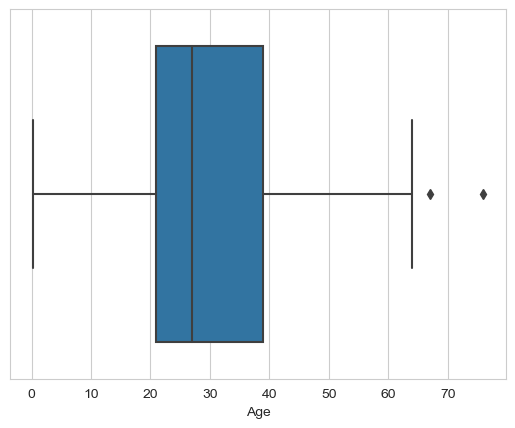

In [103]:
sns.boxplot(x=df_test['Age'])
plt.show()

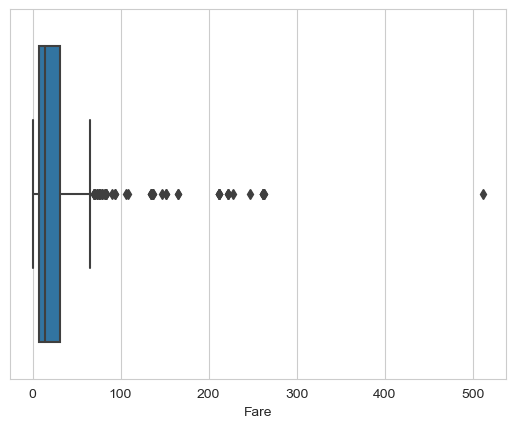

In [104]:
sns.boxplot(x=df_test['Fare'])
plt.show()

In [105]:
df_test['Age'].fillna(df_test['Age'].median(),inplace=True)
df_test['Fare'].fillna(df_test['Fare'].median(),inplace=True)

In [106]:
df_test['Embarked'].value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

In [107]:
df_test['Pclass'].skew()

-0.5341703482345055

In [108]:
df_test['Age'].skew()

0.6607470412147504

In [109]:
df_test['SibSp'].skew()

4.168336568562722

In [110]:
df_test['Parch'].skew()

4.654461698299236

In [111]:
df_test['Fare'].skew()

3.6922987243405156

In [112]:
from scipy import stats
df_test['SibSp_boxcox'],param = stats.boxcox(df_test.SibSp+0.01)
df_test['SibSp_boxcox'].skew()

0.7615994954631143

In [113]:
df_test['Parch_boxcox'],param = stats.boxcox(df_test.Parch+0.01)
df_test['Parch_boxcox'].skew()

1.3228328820583866

In [114]:
df_test['Fare_boxcox'],param = stats.boxcox(df_test.Fare+0.01)
df_test['Fare_boxcox'].skew()

0.10962532236494958

In [115]:
df_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,SibSp_boxcox,Parch_boxcox,Fare_boxcox
0,892,3,male,34.5,0,0,7.8292,Q,-16.886222,-53.231633,2.190775
1,893,3,female,47.0,1,0,7.0000,S,0.009927,-53.231633,2.064803
2,894,2,male,62.0,0,0,9.6875,Q,-16.886222,-53.231633,2.432803
3,895,3,male,27.0,0,0,8.6625,S,-16.886222,-53.231633,2.305325
4,896,3,female,22.0,1,1,12.2875,S,0.009927,0.009910,2.706693


In [116]:
df_test.drop(columns=['SibSp','Parch','Fare'],inplace=True)
df_test.head()

,PassengerId,Pclass,Sex,Age,Embarked,SibSp_boxcox,Parch_boxcox,Fare_boxcox
0,892,3,male,34.5,Q,-16.886222,-53.231633,2.190775
1,893,3,female,47.0,S,0.009927,-53.231633,2.064803
2,894,2,male,62.0,Q,-16.886222,-53.231633,2.432803
3,895,3,male,27.0,S,-16.886222,-53.231633,2.305325
4,896,3,female,22.0,S,0.009927,0.009910,2.706693


In [117]:
enc_embark = pd.get_dummies(df_test['Embarked'],drop_first = True)
df_test = pd.concat([df_test,enc_embark],axis=1)
df_test.drop('Embarked',axis=1,inplace=True)

enc_sex = pd.get_dummies(df_test['Sex'],drop_first = True)
df_test = pd.concat([df_test,enc_sex],axis=1)
df_test.drop('Sex',axis=1,inplace=True)
df_test.head()


,PassengerId,Pclass,Age,SibSp_boxcox,Parch_boxcox,Fare_boxcox,Q,S,male
0,892,3,34.5,-16.886222,-53.231633,2.190775,1,0,1
1,893,3,47.0,0.009927,-53.231633,2.064803,0,1,0
2,894,2,62.0,-16.886222,-53.231633,2.432803,1,0,1
3,895,3,27.0,-16.886222,-53.231633,2.305325,0,1,1
4,896,3,22.0,0.009927,0.009910,2.706693,0,1,0


In [118]:
df_test['SibSp']=df_test['SibSp_boxcox']
df_test['Parch'] = df_test['Parch_boxcox']
df_test['Fare'] = df_test['Fare_boxcox']
df_test.drop(columns = ['SibSp_boxcox','Parch_boxcox','Fare_boxcox'],inplace=True)
df_test.drop('Pclass',inplace=True,axis=1)
df_test.head()

,PassengerId,Age,Q,S,male,SibSp,Parch,Fare
0,892,34.5,1,0,1,-16.886222,-53.231633,2.190775
1,893,47.0,0,1,0,0.009927,-53.231633,2.064803
2,894,62.0,1,0,1,-16.886222,-53.231633,2.432803
3,895,27.0,0,1,1,-16.886222,-53.231633,2.305325
4,896,22.0,0,1,0,0.009927,0.009910,2.706693


In [119]:
df_test= df_test[['PassengerId','male','Age','SibSp','Parch','Fare','Q','S']]
df_test.head()

,PassengerId,male,Age,SibSp,Parch,Fare,Q,S
0,892,1,34.5,-16.886222,-53.231633,2.190775,1,0
1,893,0,47.0,0.009927,-53.231633,2.064803,0,1
2,894,1,62.0,-16.886222,-53.231633,2.432803,1,0
3,895,1,27.0,-16.886222,-53.231633,2.305325,0,1
4,896,0,22.0,0.009927,0.009910,2.706693,0,1


In [120]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df_test['Age']=sc.fit_transform(df_test[['Age']])

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
df_test['Parch']=sc.fit_transform(df_test[['Parch']])
df_test.head()

,PassengerId,male,Age,SibSp,Parch,Fare,Q,S
0,892,1,0.386231,-16.886222,0.000000,2.190775,1,0
1,893,0,1.371370,0.009927,0.000000,2.064803,0,1
2,894,1,2.553537,-16.886222,0.000000,2.432803,1,0
3,895,1,-0.204852,-16.886222,0.000000,2.305325,0,1
4,896,0,-0.598908,0.009927,0.981505,2.706693,0,1


In [121]:
Survived=log_reg.predict(df_test)

In [122]:
Survived

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [123]:
test_pred_logistic = df_test[['PassengerId']]
test_pred_logistic.head()

,PassengerId
0,892
1,893
2,894
3,895
4,896


In [124]:
test_pred_logistic['Survived']=pd.DataFrame(Survived)
test_pred_logistic

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [125]:
test_pred_logistic['Survived'].value_counts()

0    268
1    150
Name: Survived, dtype: int64

In [126]:
test_pred_logistic.to_csv('logistic_pred.csv',index=False)

In [127]:
adaboost = df_test[['male', 'Age', 'SibSp', 'Fare']]
adaboost.head()

,male,Age,SibSp,Fare
0,1,0.386231,-16.886222,2.190775
1,0,1.371370,0.009927,2.064803
2,1,2.553537,-16.886222,2.432803
3,1,-0.204852,-16.886222,2.305325
4,0,-0.598908,0.009927,2.706693


In [128]:
s1 = ada_bhp.predict(adaboost)
s1

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [129]:
gradientboost = gb_bhp.predict(df_test)
gradientboost

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [130]:
test_pred_gboost = df_test[['PassengerId']]
test_pred_gboost

,PassengerId
0,892
1,893
2,894
3,895
4,896
...,...
413,1305
414,1306
415,1307
416,1308


In [131]:
test_pred_gboost['Survived']=pd.DataFrame(gradientboost)
test_pred_gboost['Survived'].value_counts()

1    398
0     20
Name: Survived, dtype: int64

In [132]:
xgboost1 = xgb_bhp.predict(df_test)
xgboost1

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [133]:
test_pred_xgboost = df_test[['PassengerId']]
test_pred_xgboost

,PassengerId
0,892
1,893
2,894
3,895
4,896
...,...
413,1305
414,1306
415,1307
416,1308


In [134]:
test_pred_xgboost['Survived']=pd.DataFrame(xgboost1)
test_pred_xgboost['Survived'].value_counts()


1    400
0     18
Name: Survived, dtype: int64

In [135]:
decisiontree = dt_bhp.predict(df_test)
decisiontree

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [136]:
test_pred_decisiontree = df_test[['PassengerId']]
test_pred_decisiontree['Survived'] = pd.DataFrame(decisiontree)
test_pred_decisiontree['Survived'].value_counts()

1    408
0     10
Name: Survived, dtype: int64